Populating the interactive namespace from numpy and matplotlib


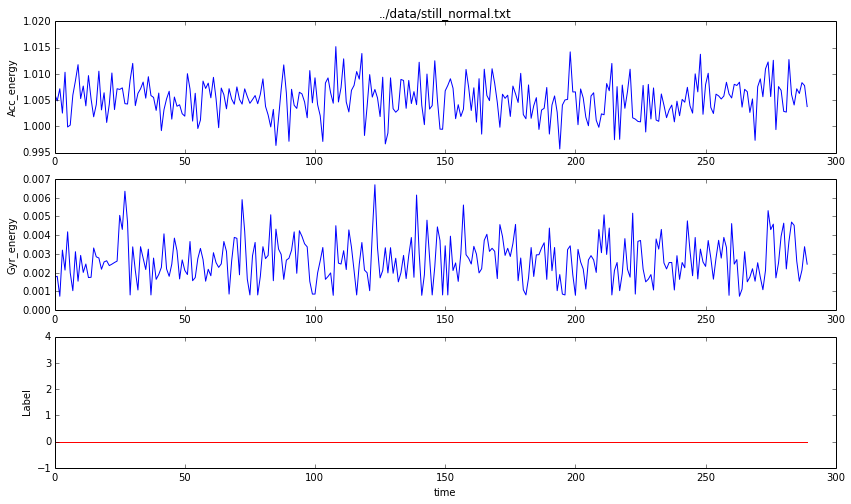

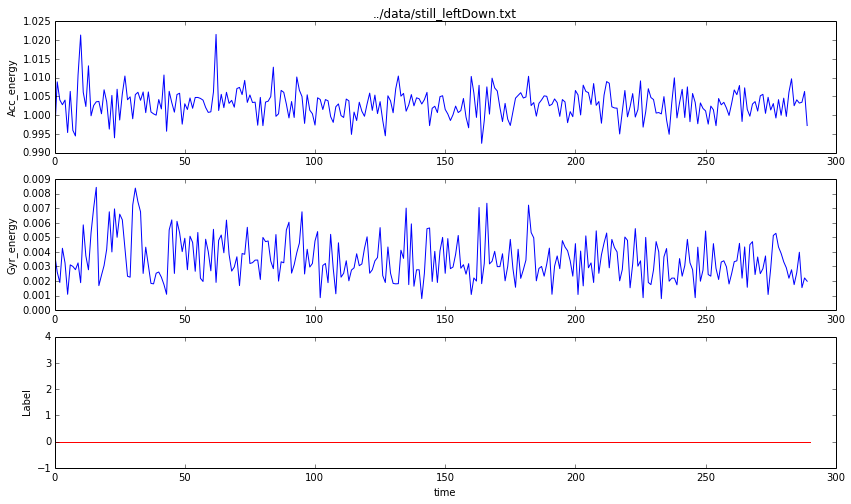

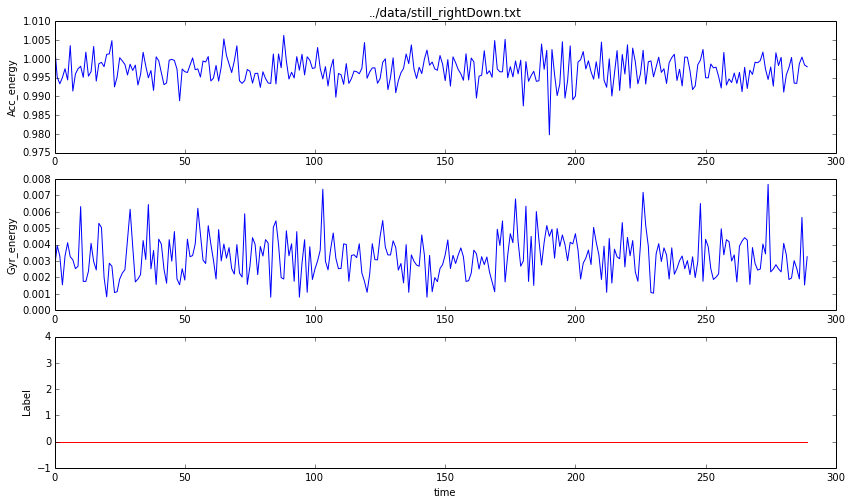

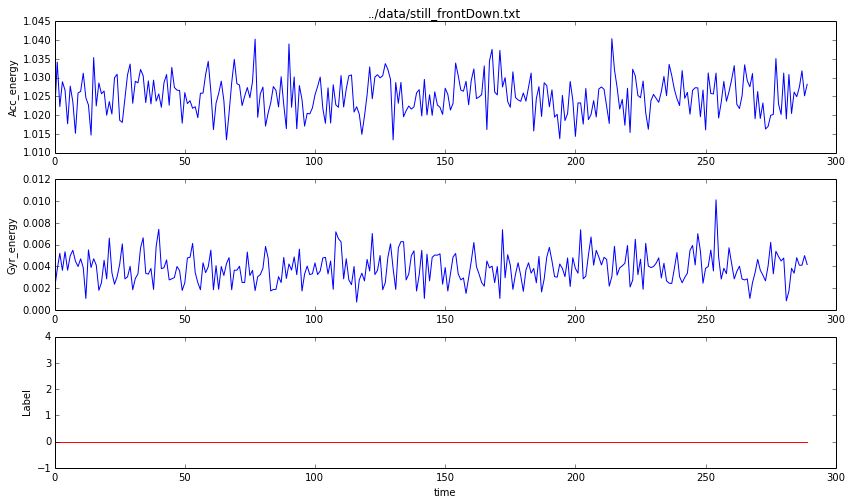

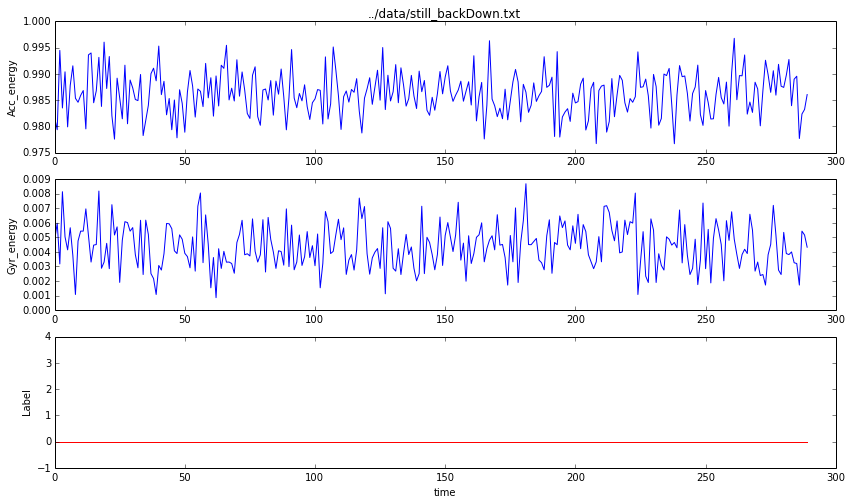

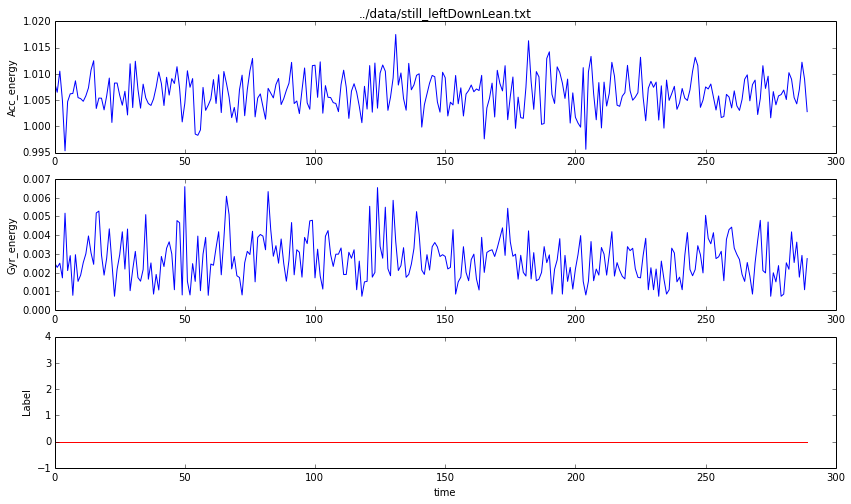

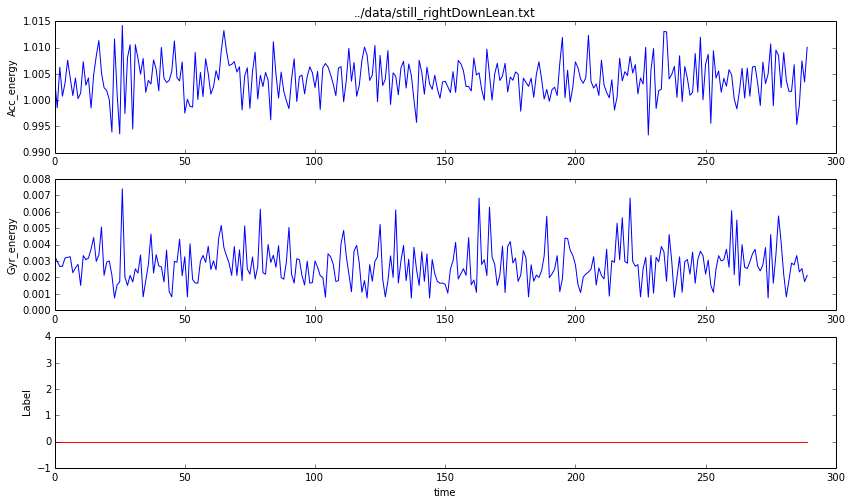

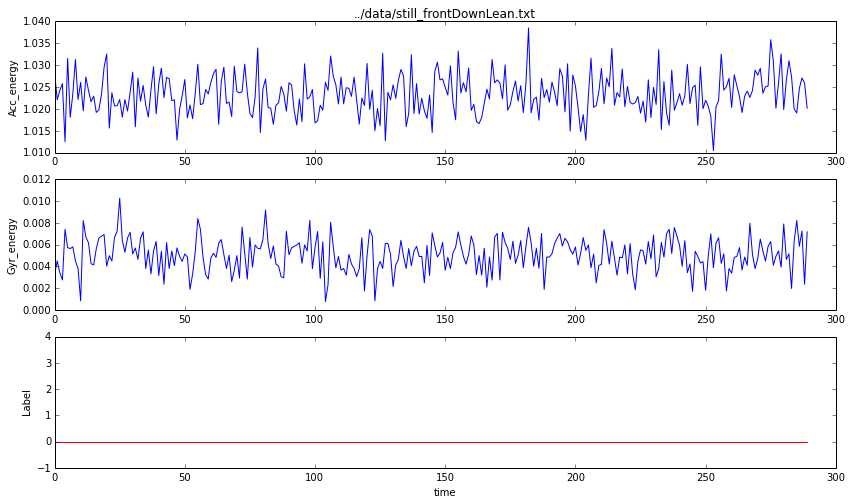

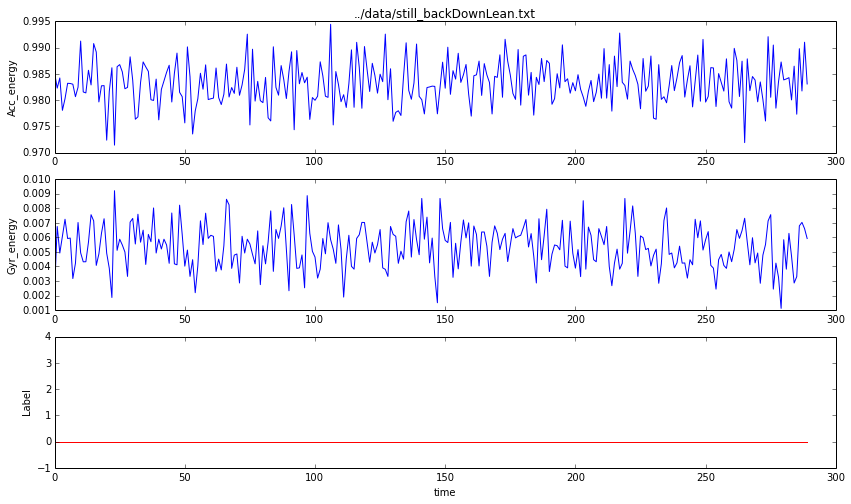

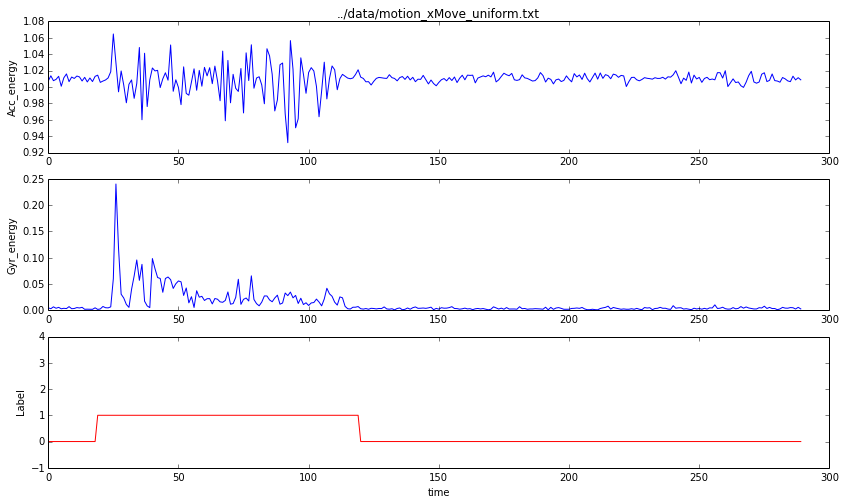

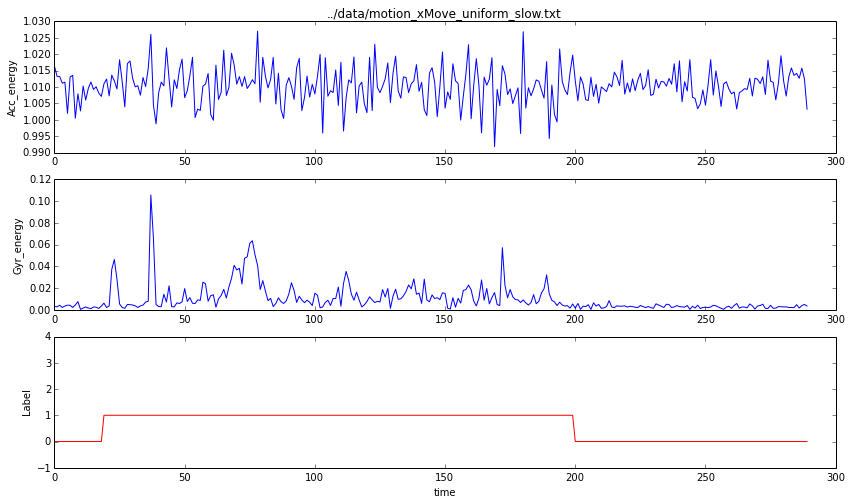

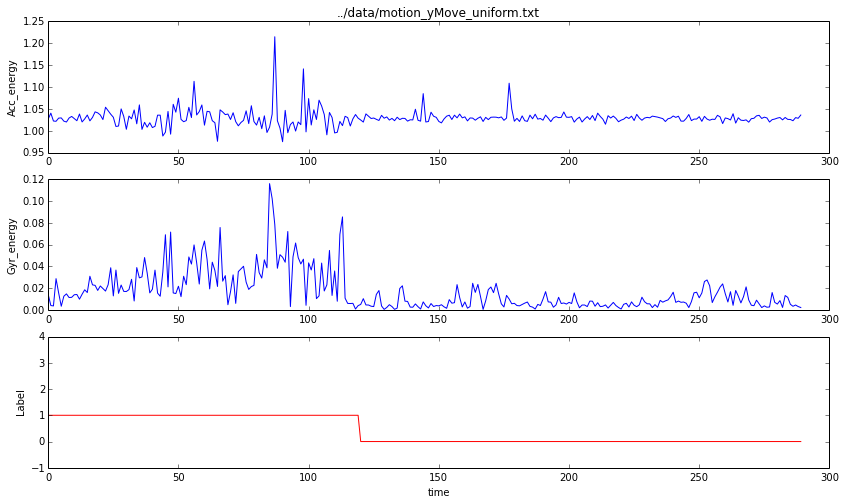

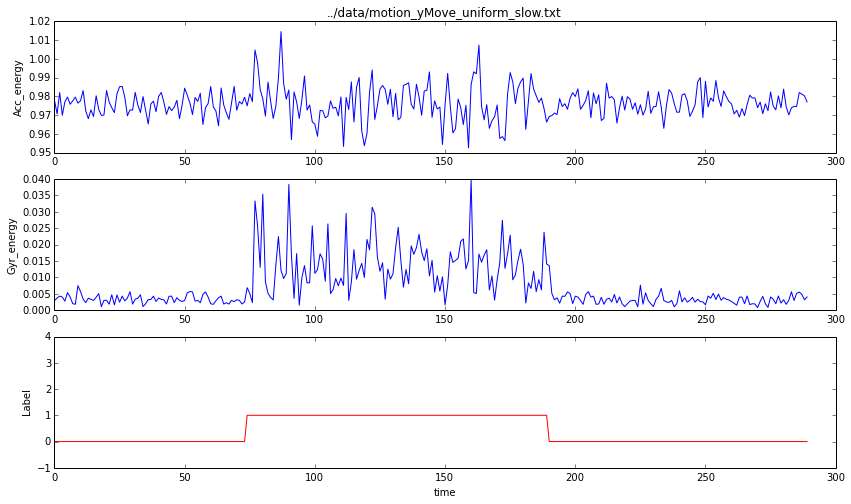

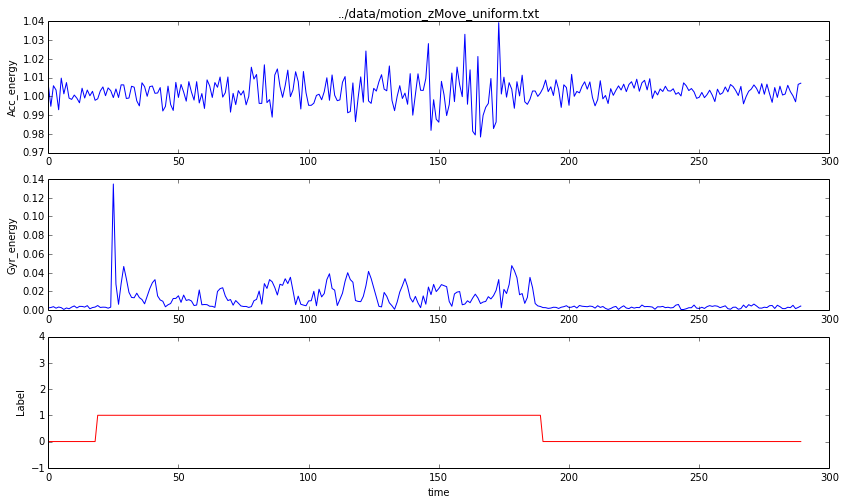

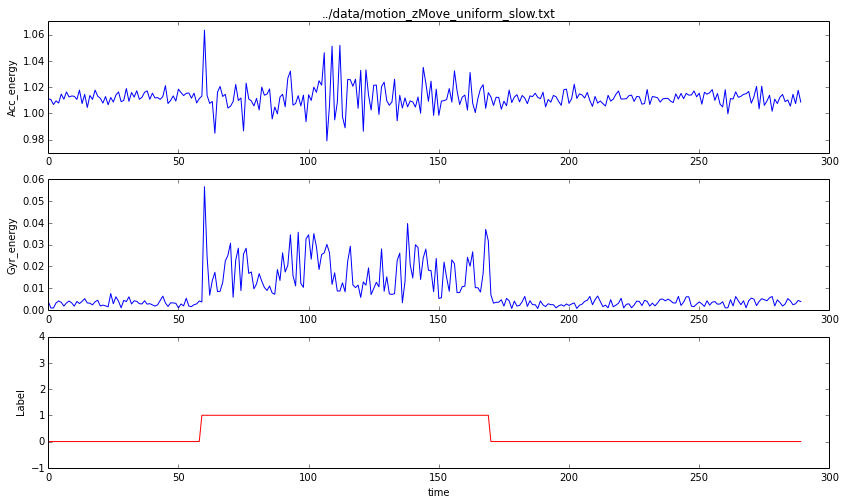

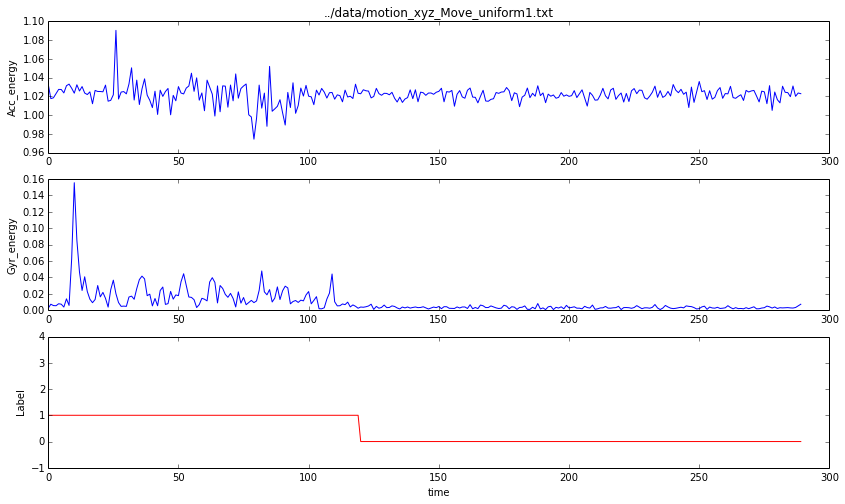

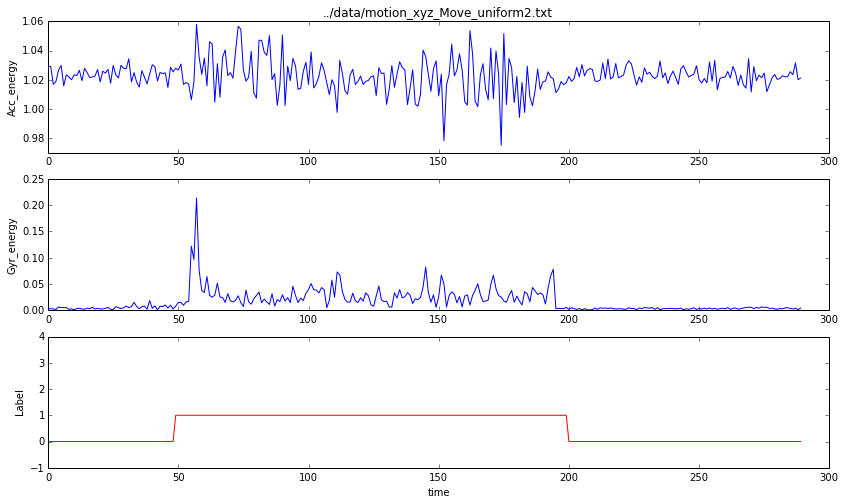

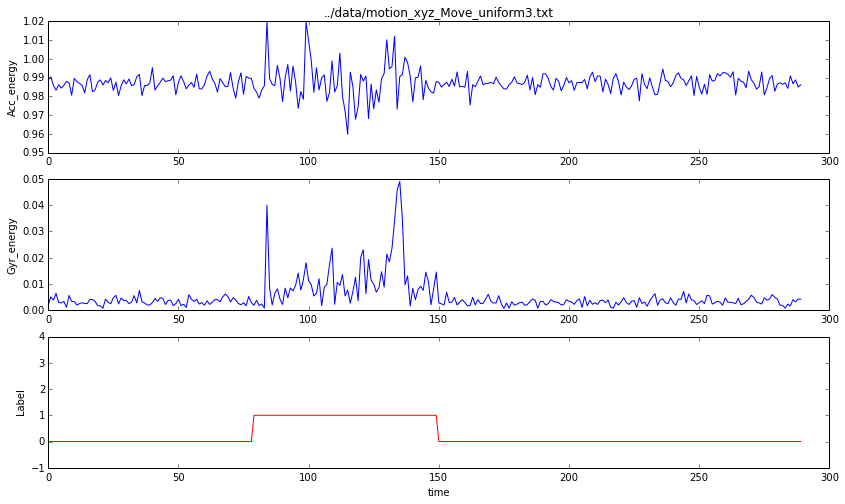

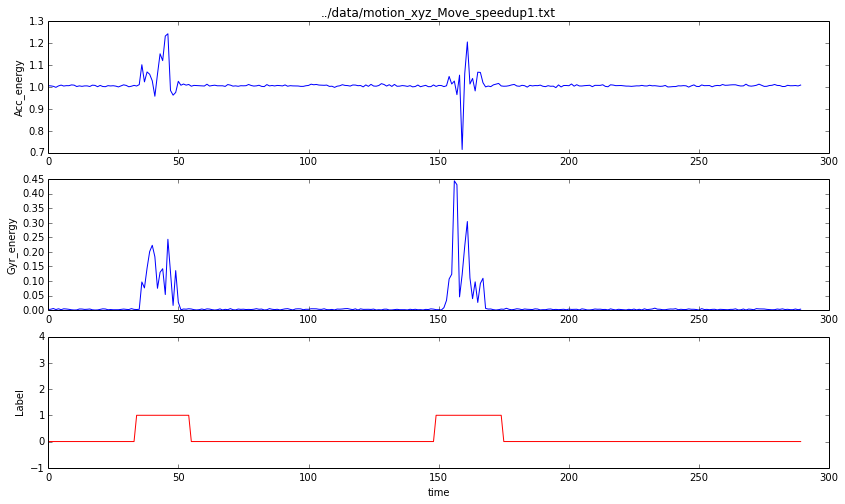

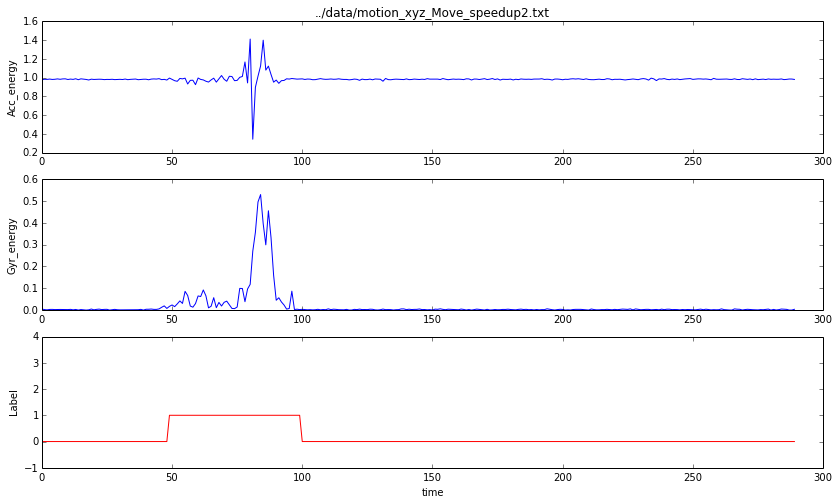

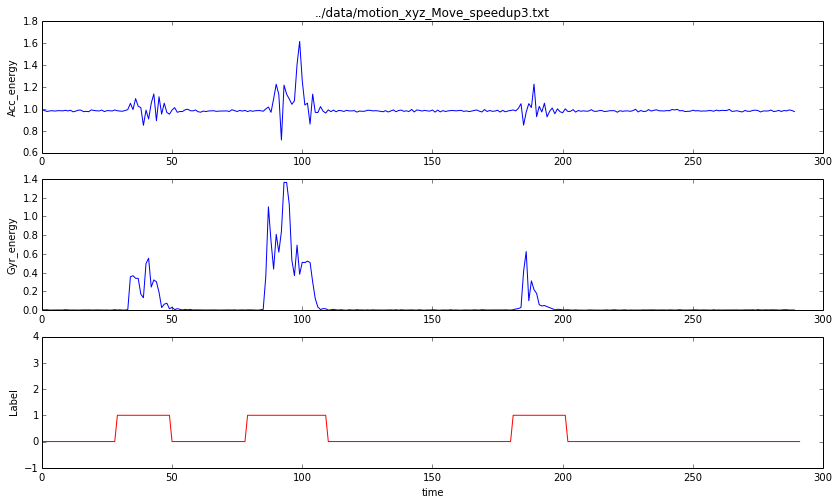

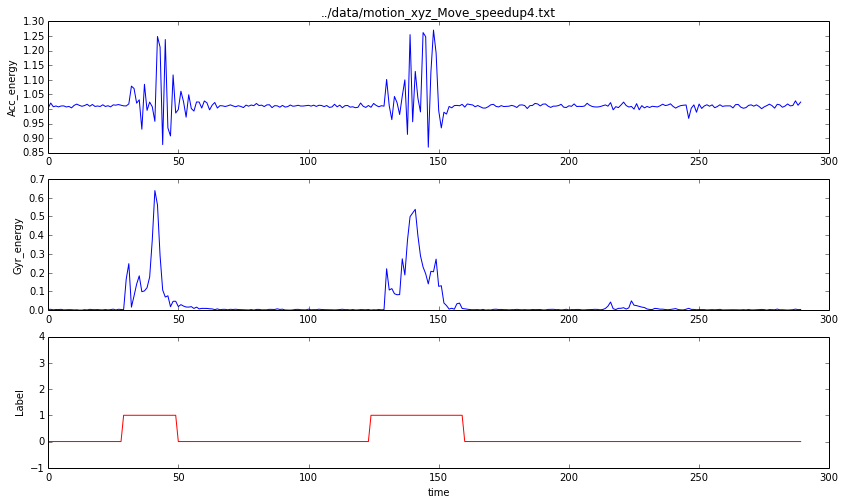

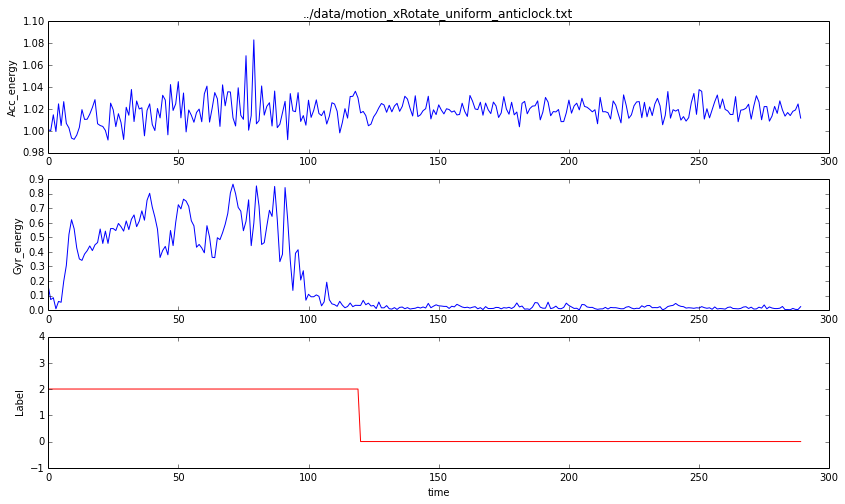

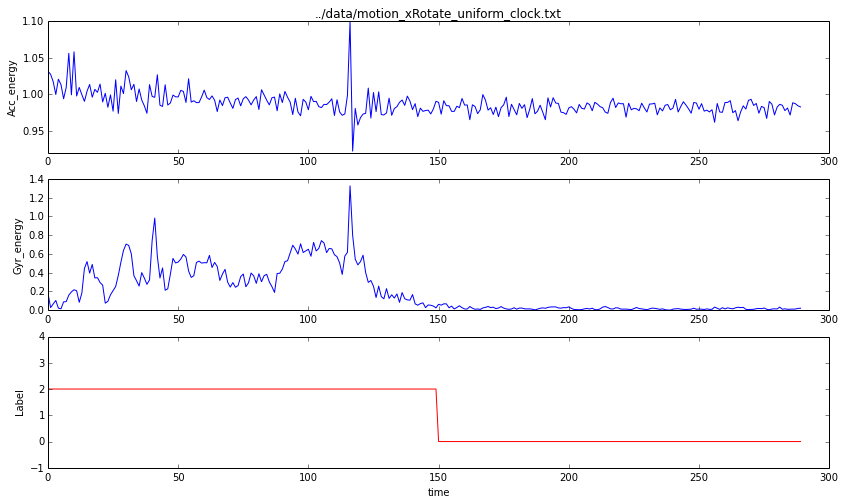

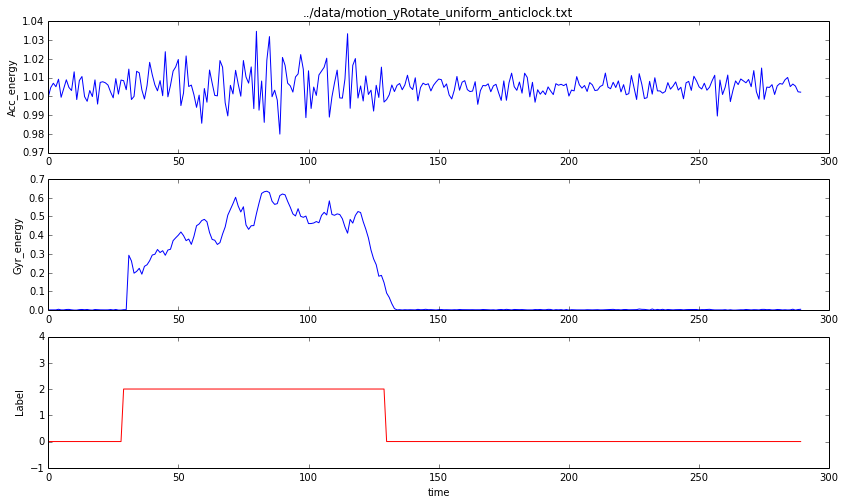

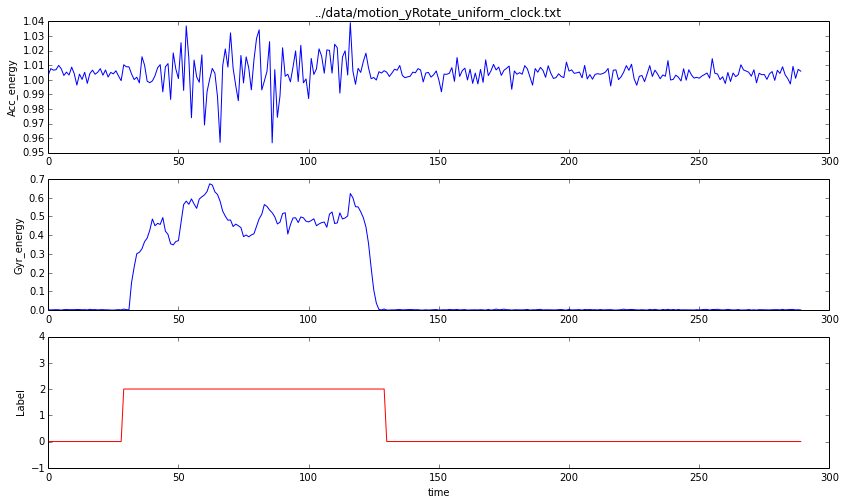

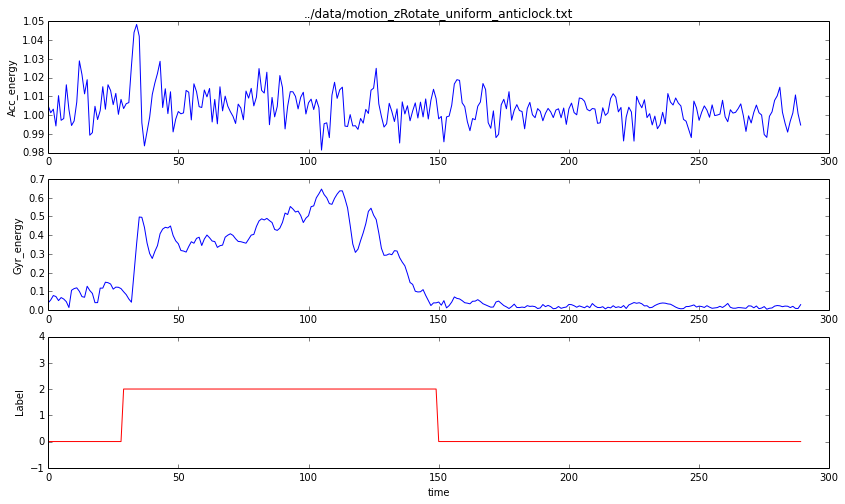

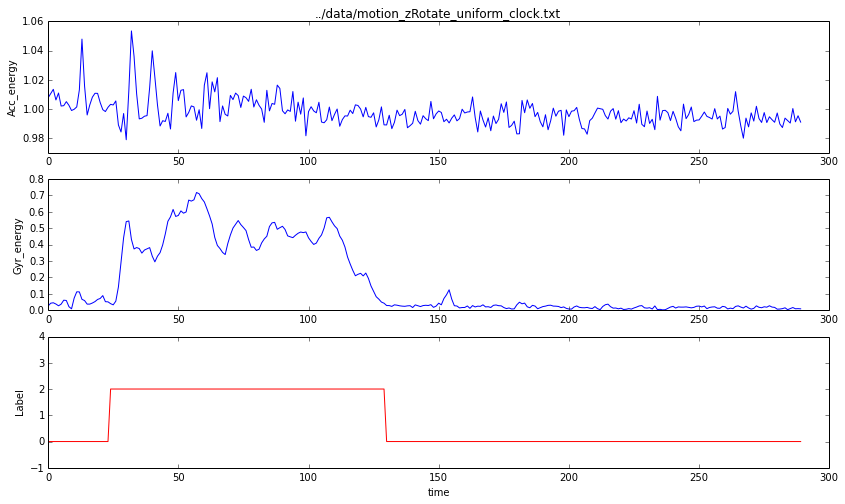

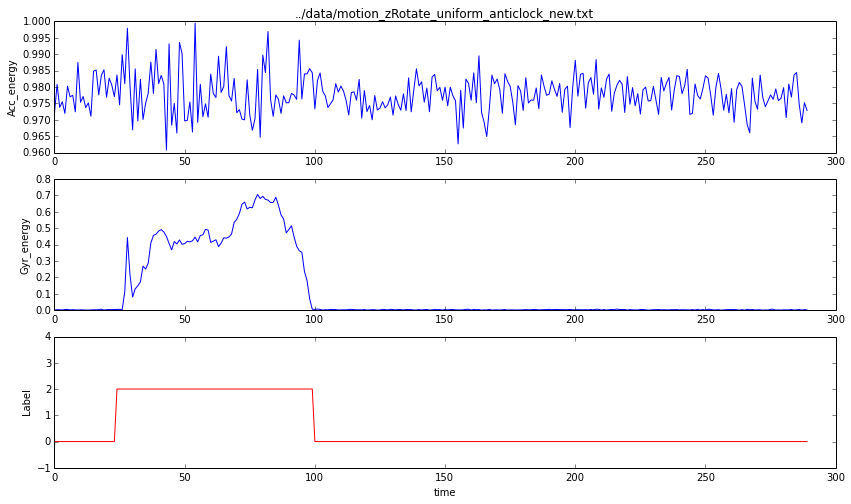

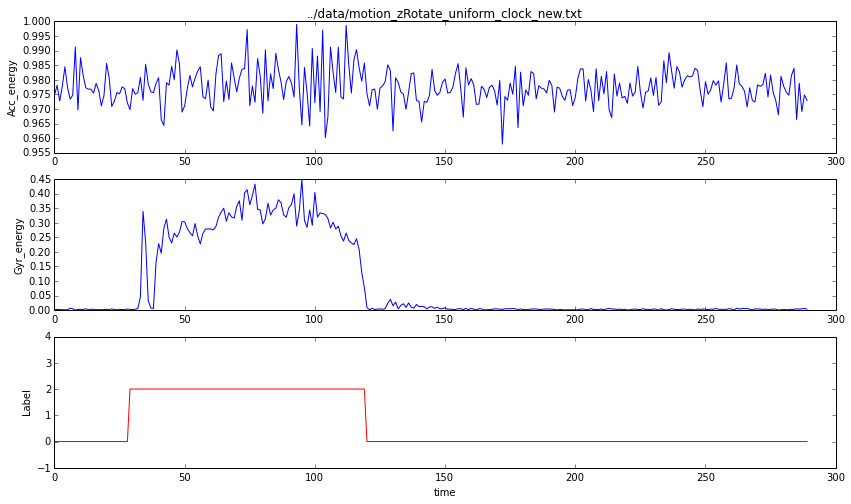

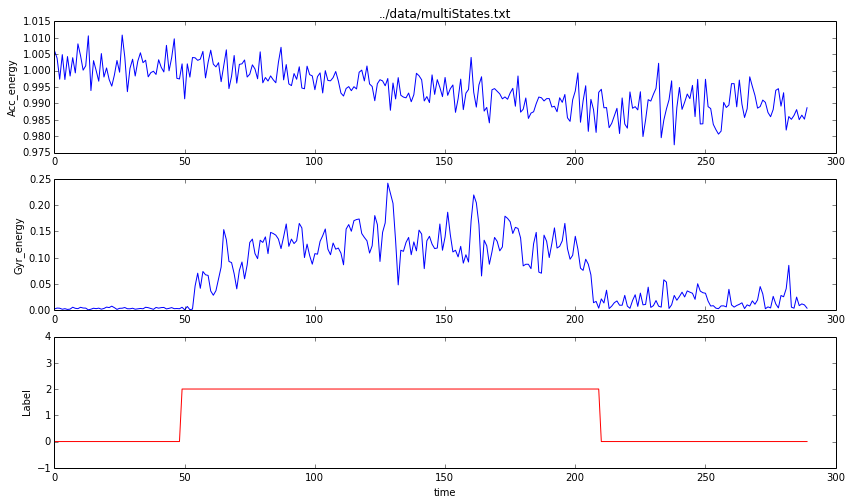

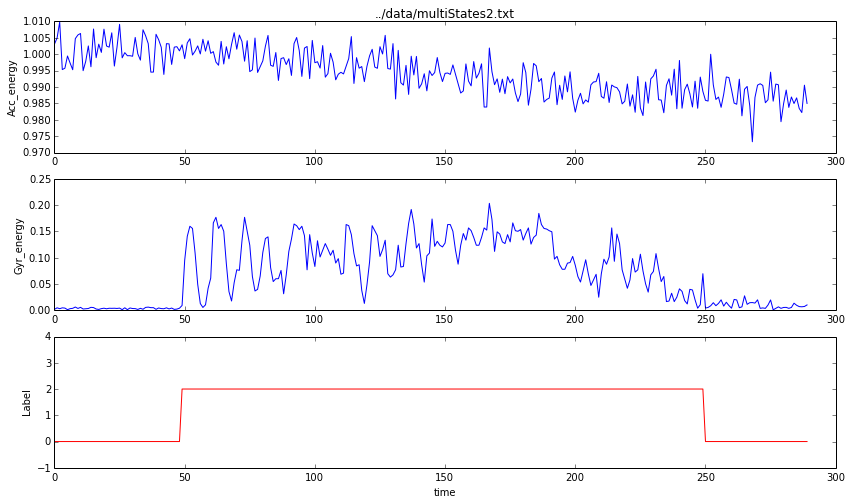

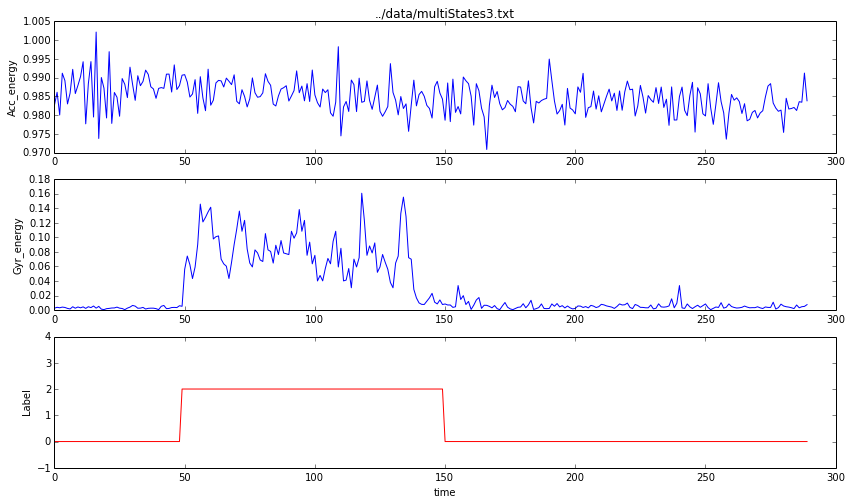

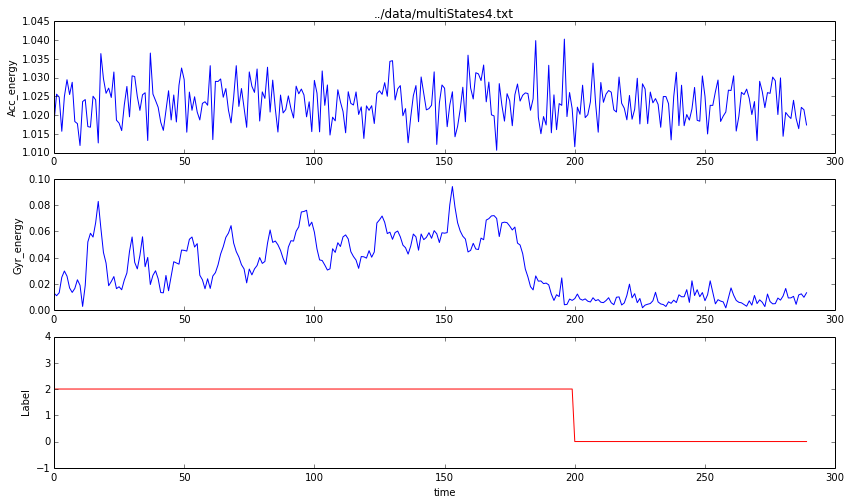

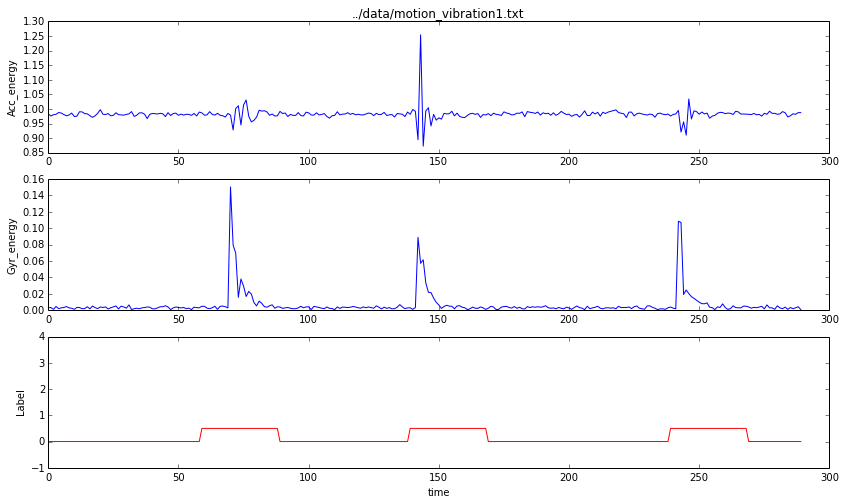

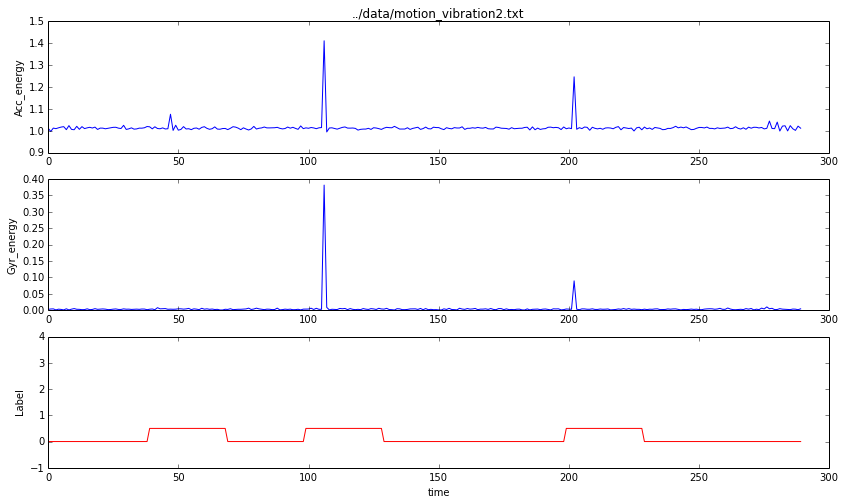

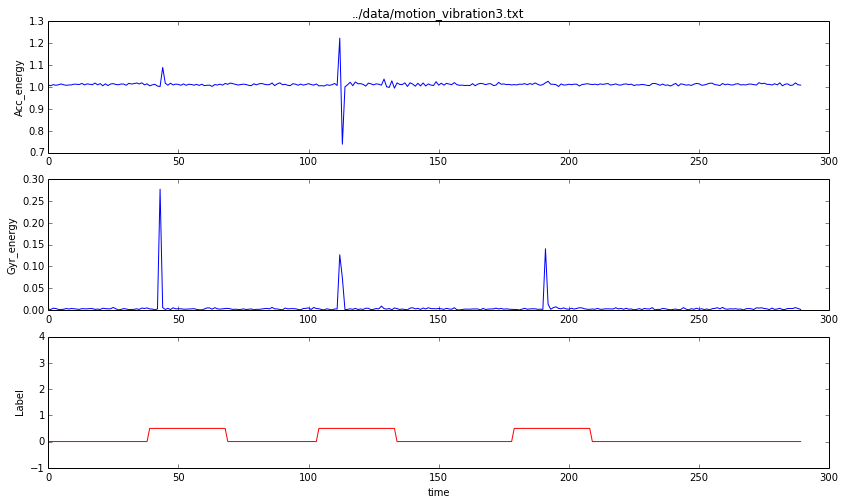

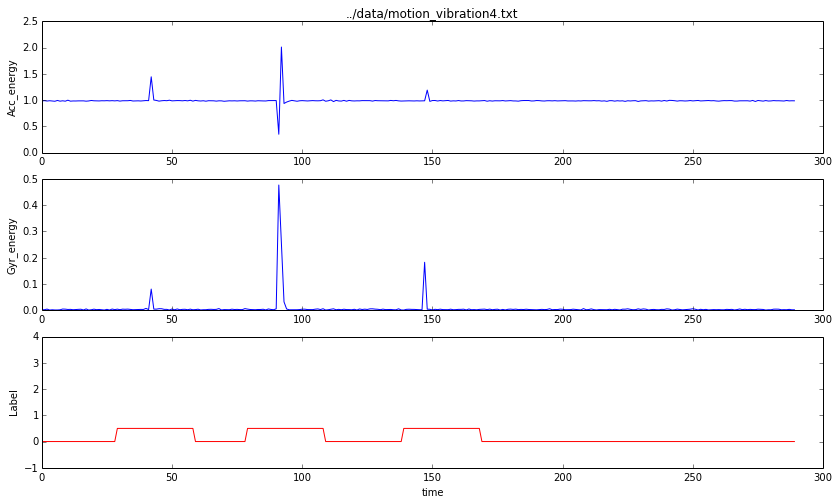

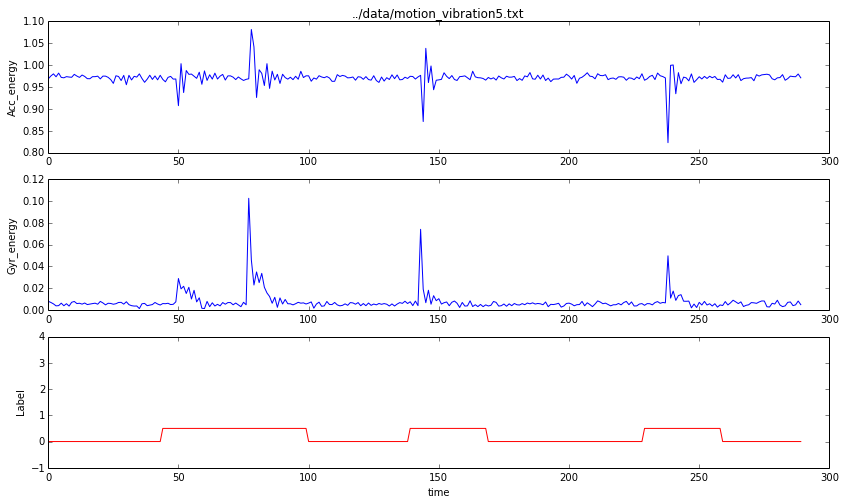

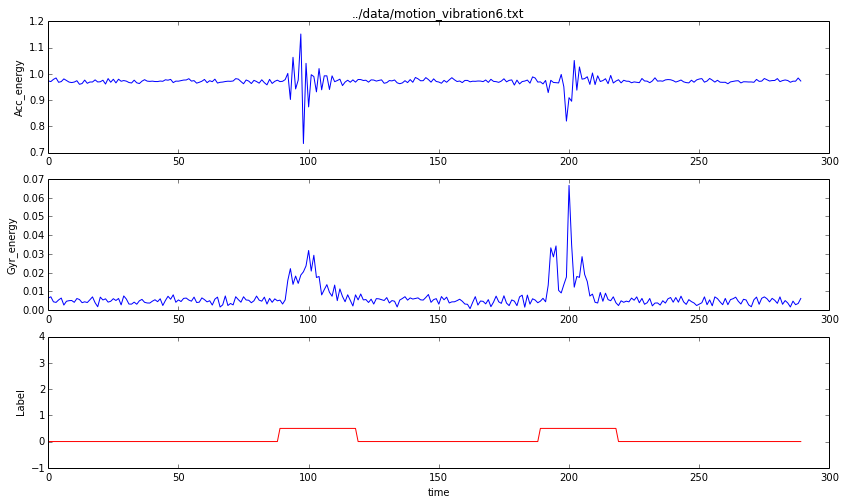

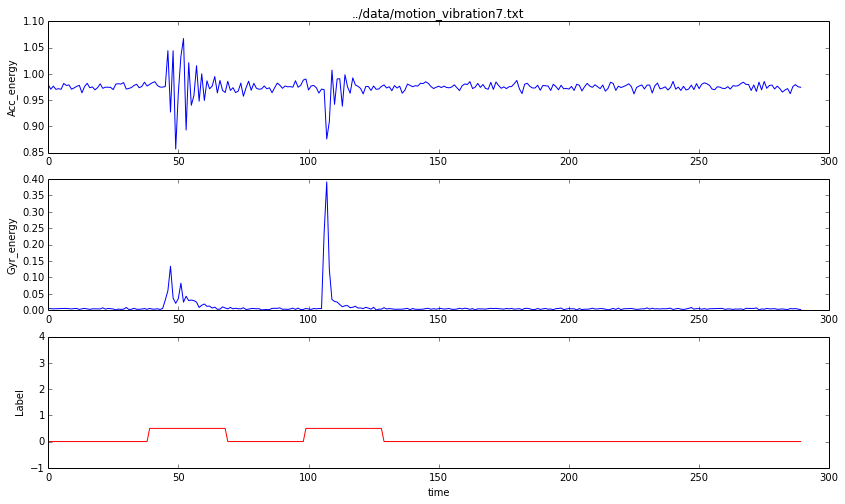

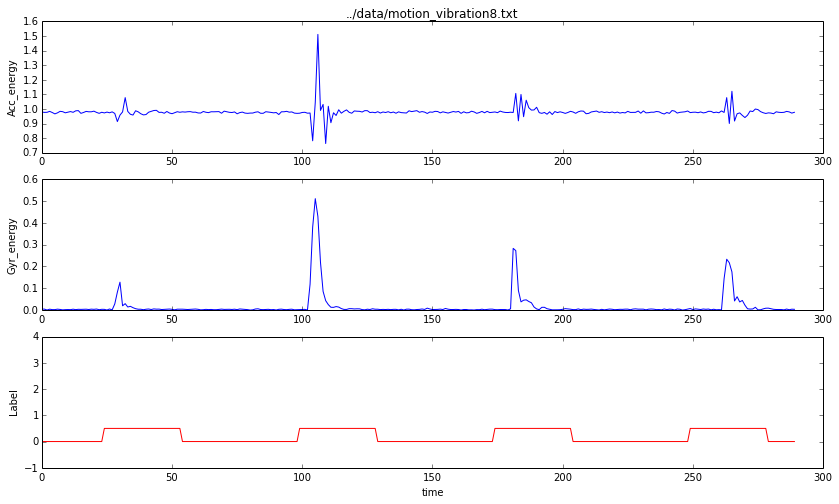

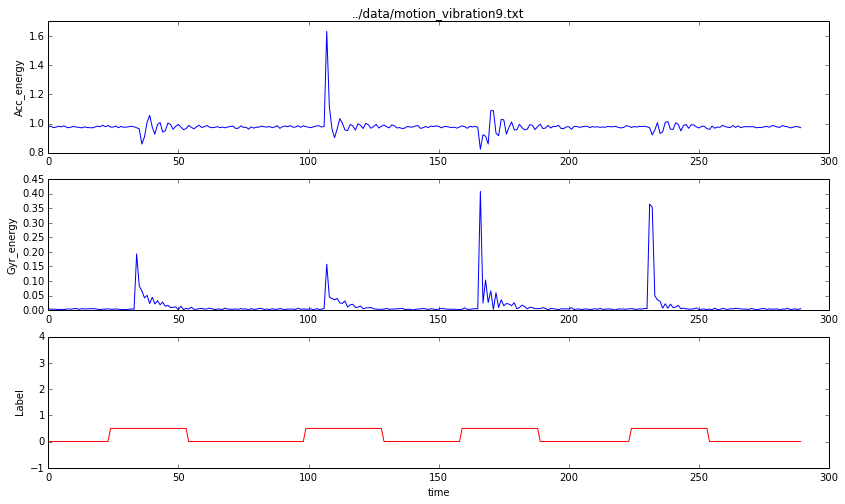

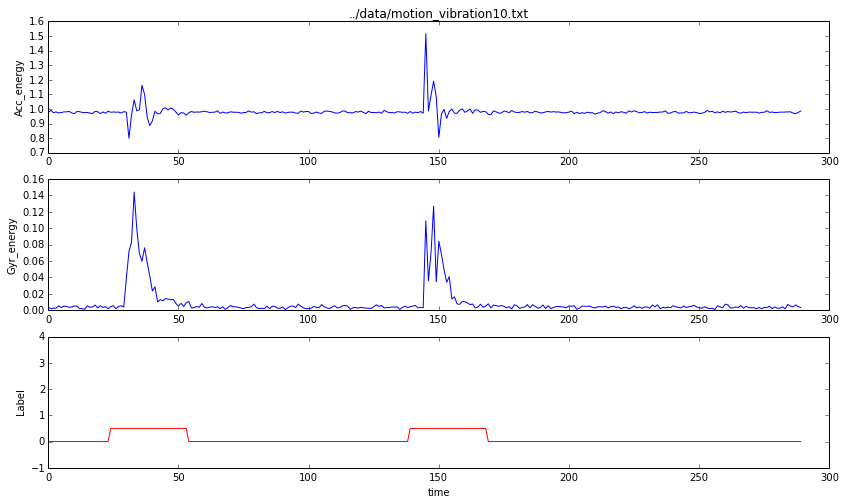

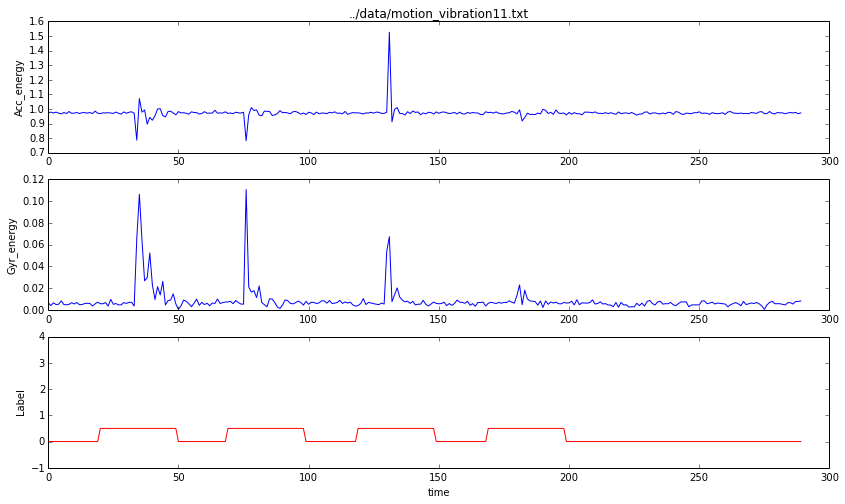

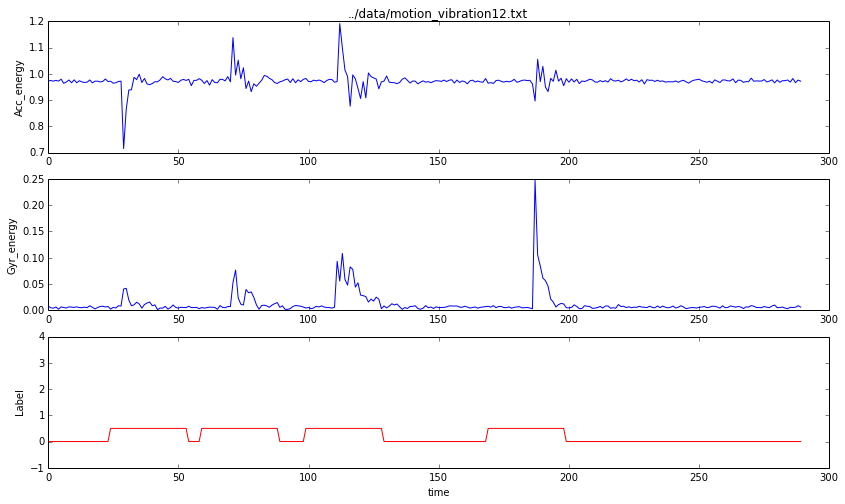

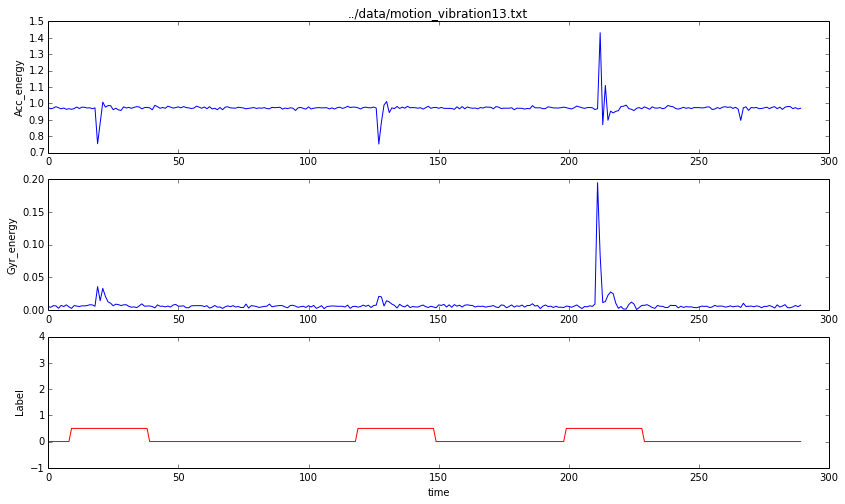

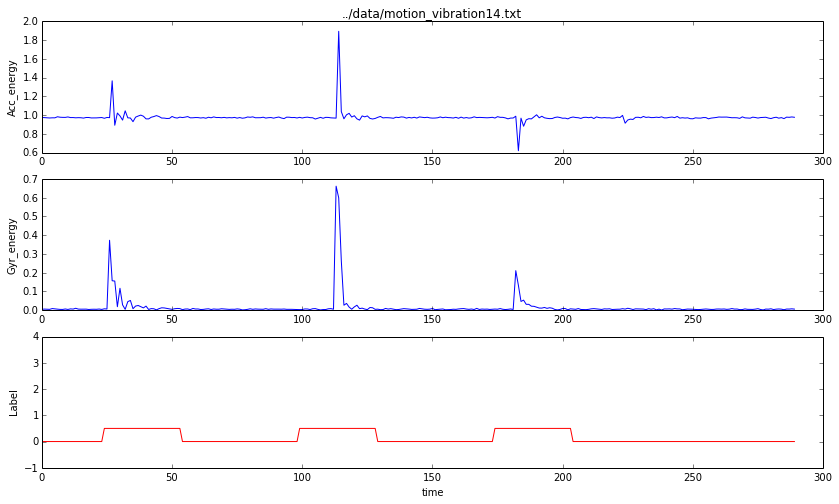

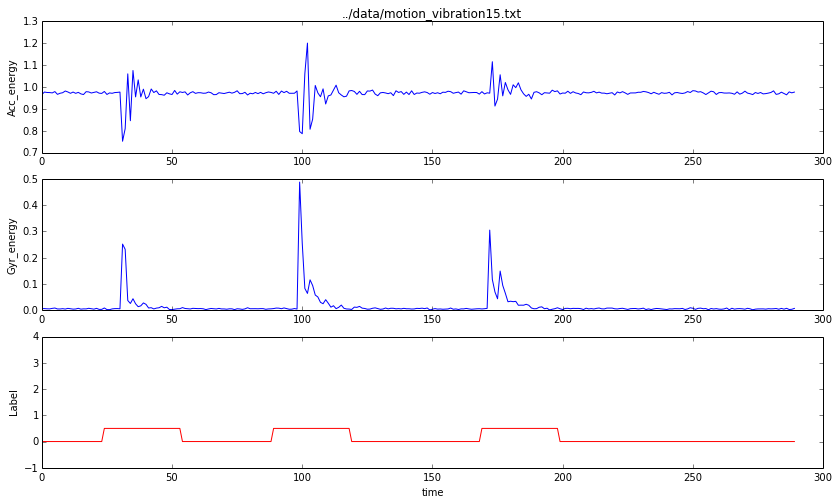

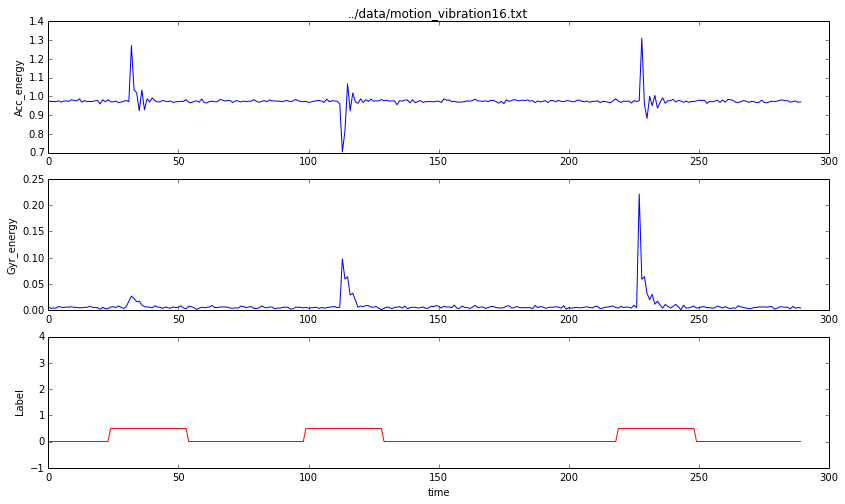

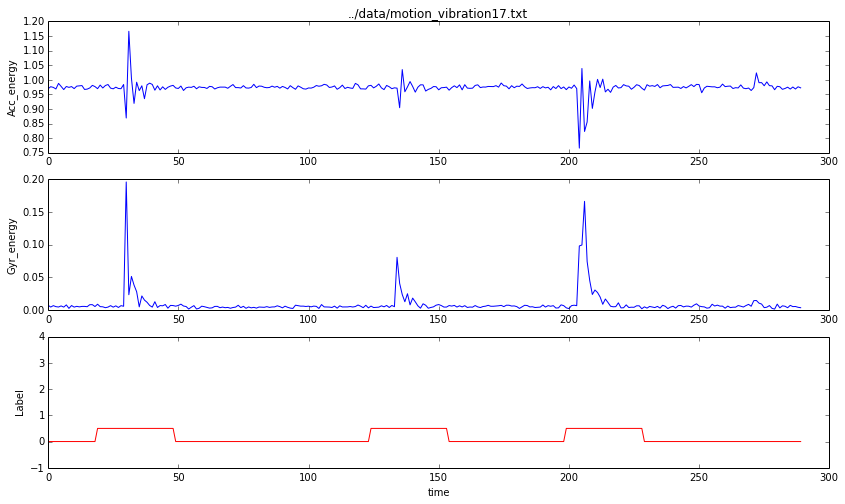

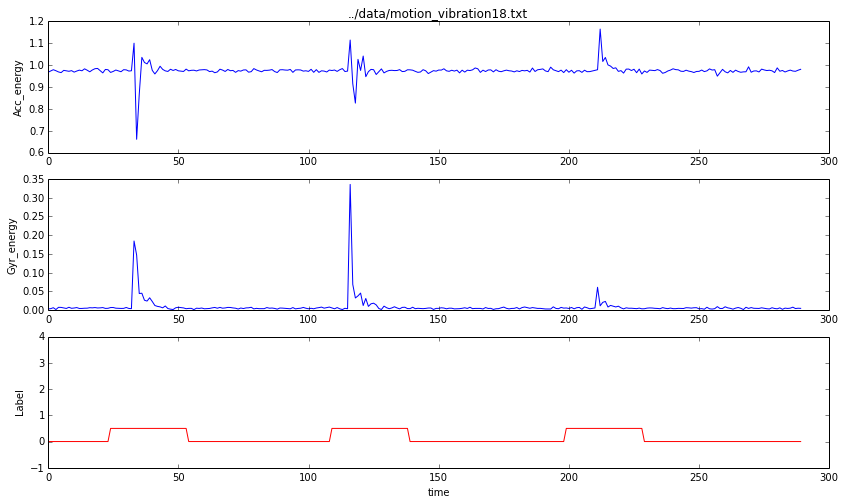

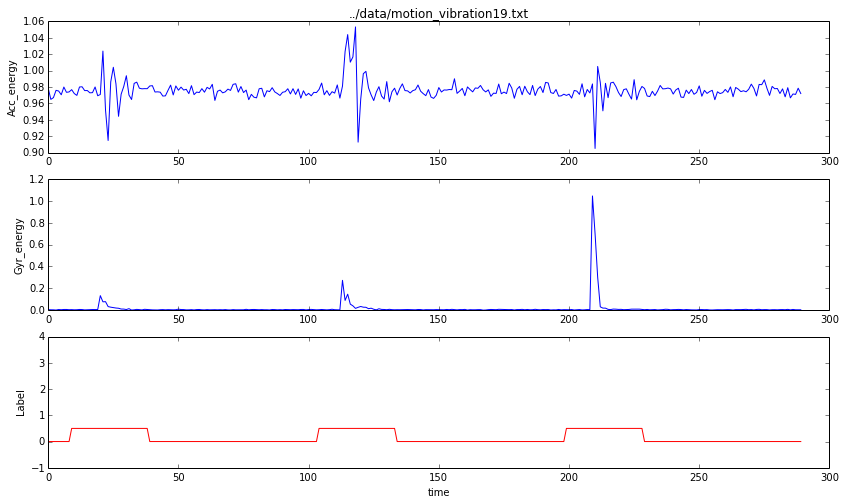

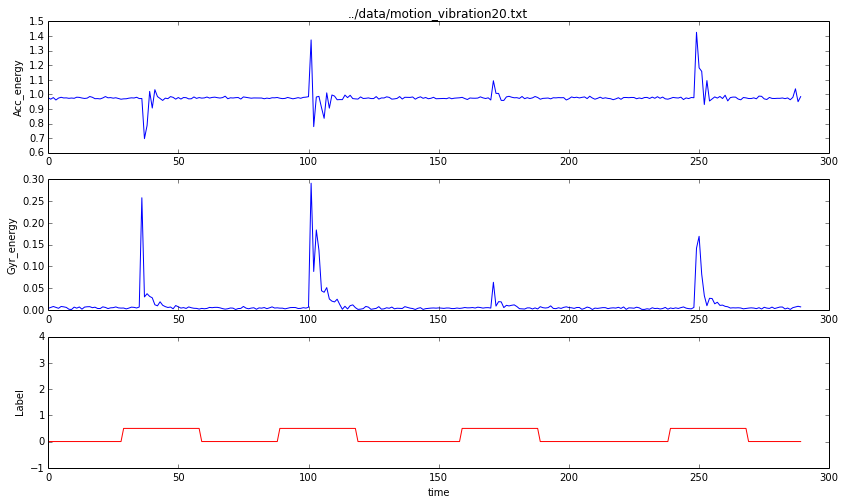

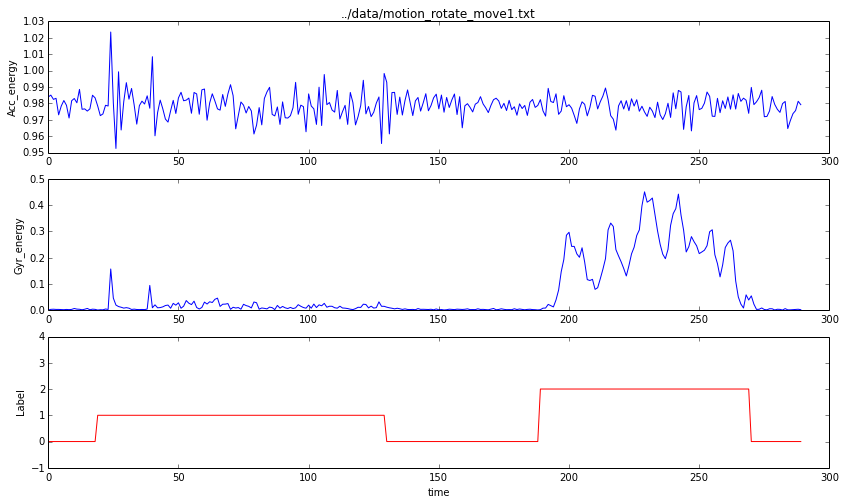

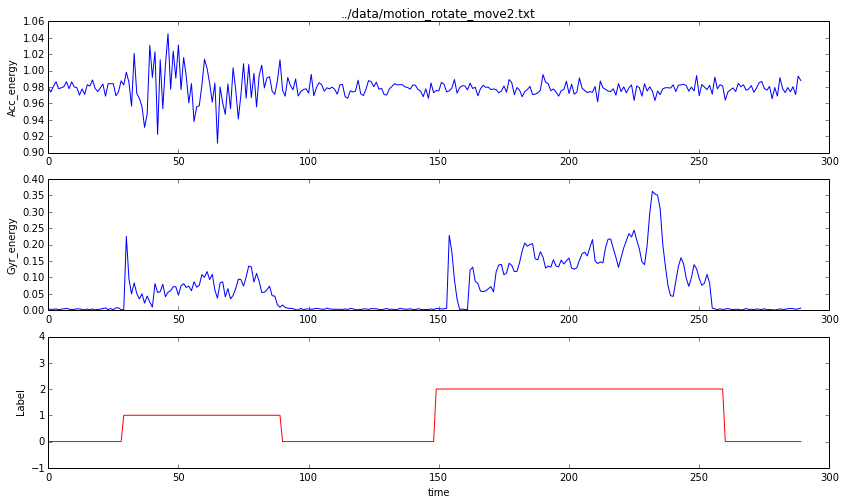

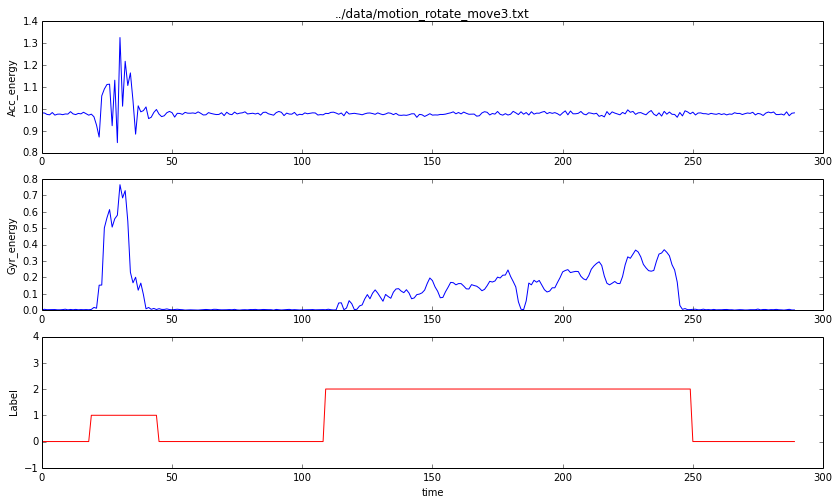

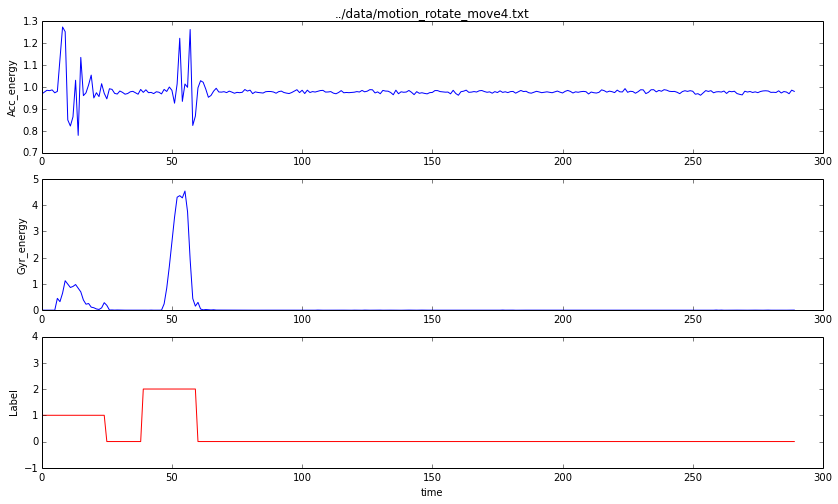

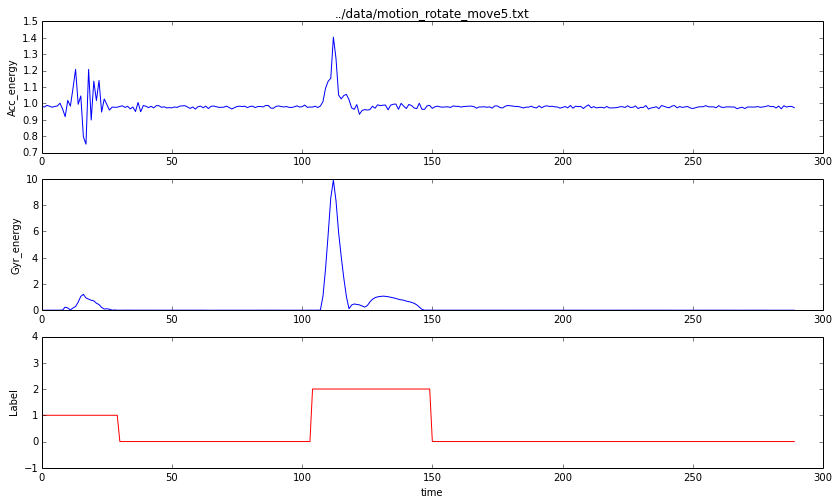

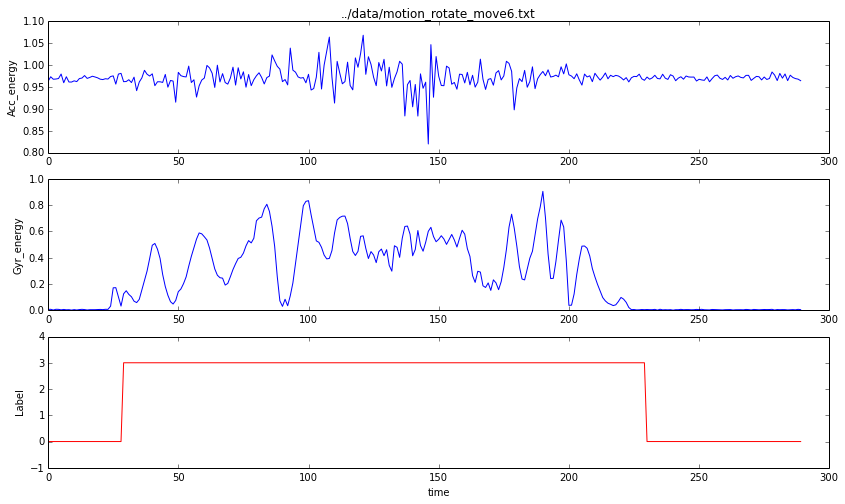

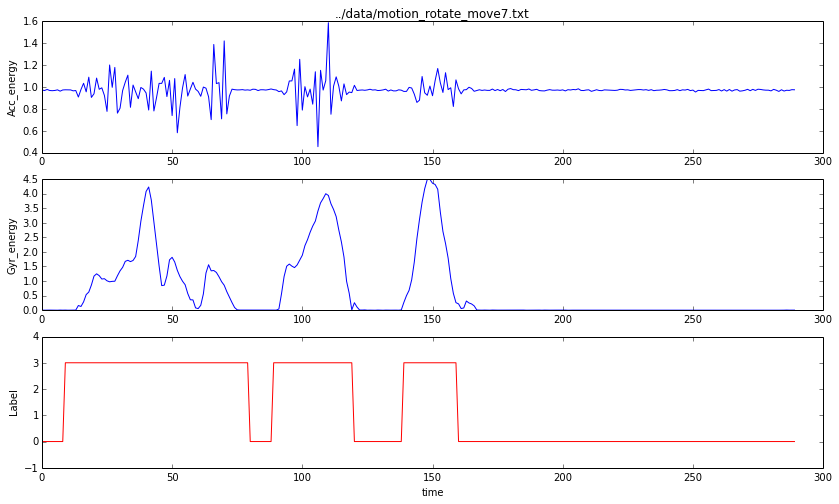

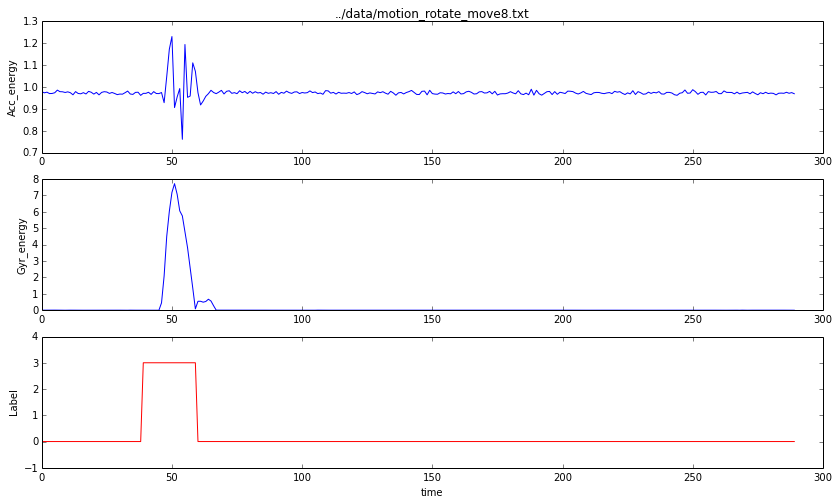

In [1]:
%pylab inline


pylab.rcParams['figure.figsize'] = (14.0, 8.0)

import numpy as np
import matplotlib.pyplot as plt
import logging

def correctBias(array):
    #still_array = getSigs('../data/still_normal.txt')
    
    
    # TODO, the parameters may need be adjusted when in different posture
    # The bias of gyr_x, gyr_y, gyr_z, statistics from still_normal.txt
    gyr_bias = np.array([-0.01568079, 0.02071555, 0.0186753 ])
    array[:, 3:6] = array[:, 3:6] - gyr_bias



# Get the IMU signals from a file
def getSigs(fileName):
    fin = open(fileName)

    lines = fin.readlines()
    fin.close()
    
    res = []
    for str in lines:
        tmp = str.split()
        tmp = map(eval, tmp)
        res.append(tmp)

    res_array = np.array(res)
    res_array = res_array[10:, :]
    correctBias(res_array)
    
    return res_array

# Get labels corresponding sig
def getLabels(fileName):
    fin = open(fileName)
    lines = fin.readlines()
    fin.close()
    #print lines
    
    endpoint_label_list = []
    for line in lines:
        str_list = line.split(' ')
        int_list = map(int, str_list)
        endpoint_label_list.append(int_list)
    
    return endpoint_label_list


# Calculate the 
def energyXYZ(array):
    energy_acc = np.sqrt(np.sum(array[:,0:3]**2, 1))
    energy_gyr = np.sqrt(np.sum(array[:,3:6]**2, 1))
    energy_mag = np.sqrt(np.sum(array[:,6:]**2, 1))
    tmp = np.array([energy_acc, energy_gyr, energy_mag])
    return np.transpose(tmp)


def extractSig(sigfilePath, labelfilePath):
    
    sig = getSigs(sigfilePath)
    endpoint_label_list = getLabels(labelfilePath)
    
    sig_energy = energyXYZ(sig)
    
    
    ## test
    tmp_label = []
    for tmp in endpoint_label_list:
        L = np.ones(tmp[1]-tmp[0]+1)*tmp[2]
        tmp_label.extend(L)
    
    tmp_label = np.array(tmp_label)
    tmp_label[tmp_label == -1] = 0.5
    
    fig,ax = plt.subplots(3)
    ax[0].plot(sig_energy[:, 0])
    ax[0].set_ylabel('Acc_energy')
    ax[1].plot(sig_energy[:, 1])
    ax[1].set_ylabel('Gyr_energy')
    ax[2].plot(tmp_label, 'r')
    ax[2].set_xlabel('time')
    ax[2].set_ylabel('Label')
    ax[2].set_ylim([-1,4])
    
    ax[0].set_title(sigfilePath)
    plt.show()
    
    

def showMultiFiles(fileNames):
    dataDir = '../data/'
    labelDir = '../label/'
    
    
    for fileName in fileNames:
        #fileName = 'motion_rotate_move4.txt'
        sigfilePath = dataDir + fileName
        ind = fileName.find('.')
    
        if ind > -1:
            labelfilePath = labelDir + fileName[:ind] + '.label'
        else:
            logging.warning("wrong labelfilePath")
    
    
        extractSig(sigfilePath, labelfilePath)
    
        
if __name__ == '__main__':
    fileNames = ['still_normal.txt', 'still_leftDown.txt', 'still_rightDown.txt', 'still_frontDown.txt',\
                 'still_backDown.txt', 'still_leftDownLean.txt', 'still_rightDownLean.txt',\
                 'still_frontDownLean.txt', 'still_backDownLean.txt', 'motion_xMove_uniform.txt', \
                 'motion_xMove_uniform_slow.txt', 'motion_yMove_uniform.txt',\
                 'motion_yMove_uniform_slow.txt', 'motion_zMove_uniform.txt', 'motion_zMove_uniform_slow.txt',\
                 'motion_xyz_Move_uniform1.txt', 'motion_xyz_Move_uniform2.txt', 'motion_xyz_Move_uniform3.txt',\
                 'motion_xyz_Move_speedup1.txt', 'motion_xyz_Move_speedup2.txt', 'motion_xyz_Move_speedup3.txt',\
                 'motion_xyz_Move_speedup4.txt', 'motion_xRotate_uniform_anticlock.txt', \
                 'motion_xRotate_uniform_clock.txt',\
                 'motion_yRotate_uniform_anticlock.txt', 'motion_yRotate_uniform_clock.txt',\
                 'motion_zRotate_uniform_anticlock.txt', 'motion_zRotate_uniform_clock.txt',\
                 'motion_zRotate_uniform_anticlock_new.txt', 'motion_zRotate_uniform_clock_new.txt',\
                 'multiStates.txt', 'multiStates2.txt', 'multiStates3.txt', 'multiStates4.txt',\
                 'motion_vibration1.txt', 'motion_vibration2.txt', 'motion_vibration3.txt',\
                 'motion_vibration4.txt', 'motion_vibration5.txt', 'motion_vibration6.txt',\
                 'motion_vibration7.txt', 'motion_vibration8.txt', 'motion_vibration9.txt',\
                 'motion_vibration10.txt', 'motion_vibration11.txt', 'motion_vibration12.txt',\
                 'motion_vibration13.txt', 'motion_vibration14.txt', 'motion_vibration15.txt',\
                 'motion_vibration16.txt', 'motion_vibration17.txt', 'motion_vibration18.txt',\
                 'motion_vibration19.txt', \
                 'motion_vibration20.txt', 'motion_rotate_move1.txt', 'motion_rotate_move2.txt', \
                 'motion_rotate_move3.txt', 'motion_rotate_move4.txt', 'motion_rotate_move5.txt',\
                 'motion_rotate_move6.txt', 'motion_rotate_move7.txt', 'motion_rotate_move8.txt']
    showMultiFiles(fileNames)


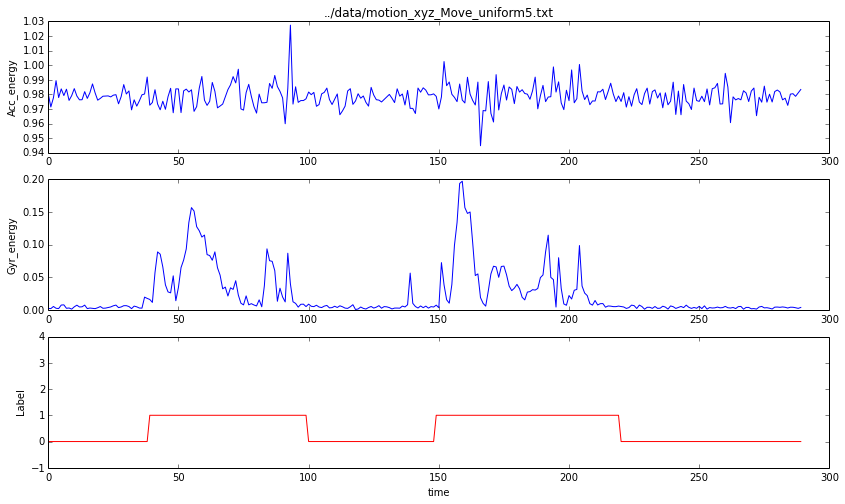

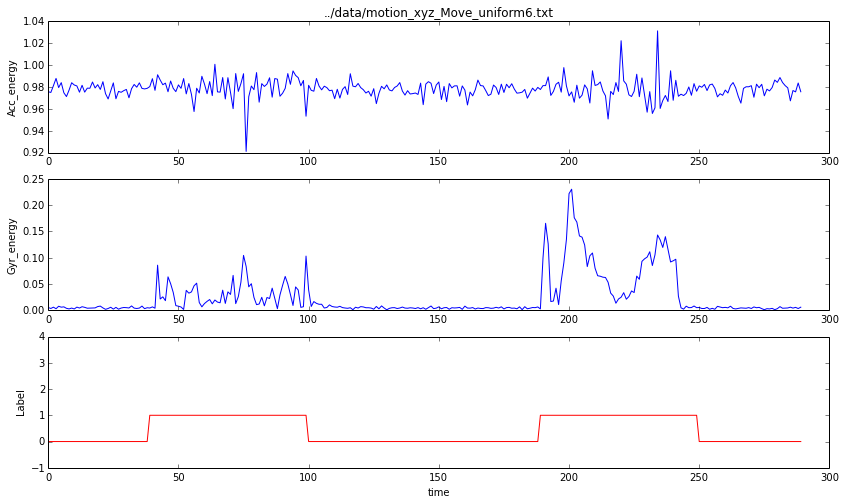

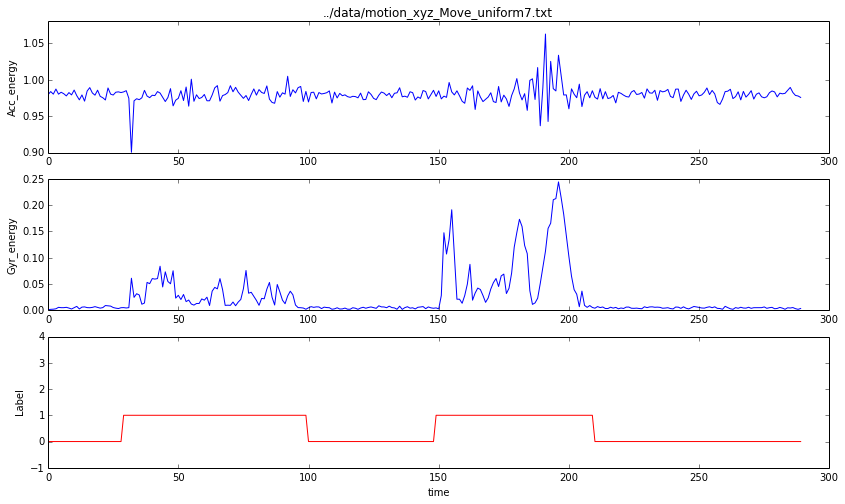

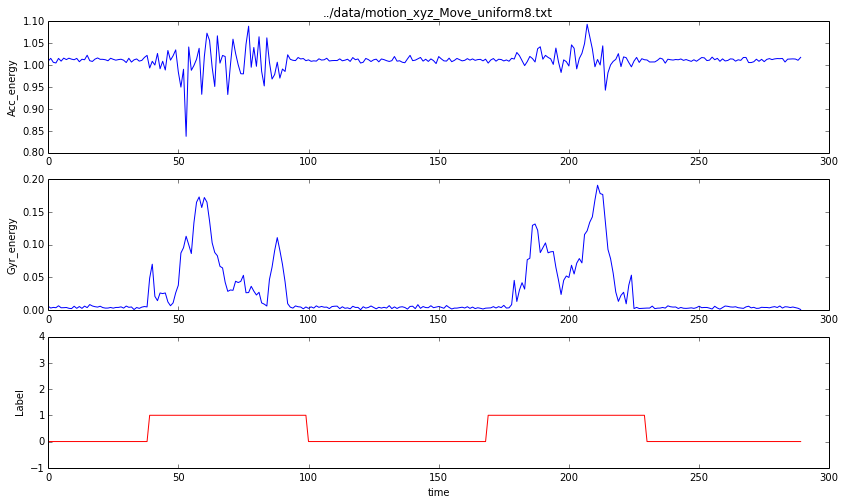

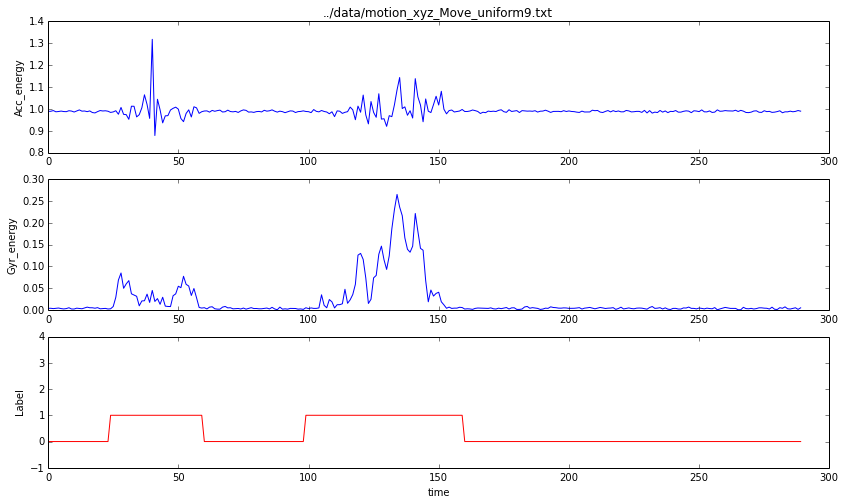

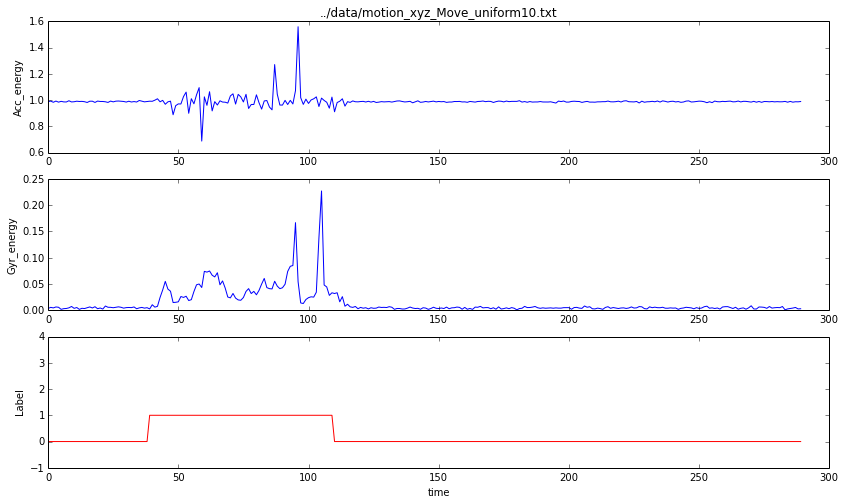

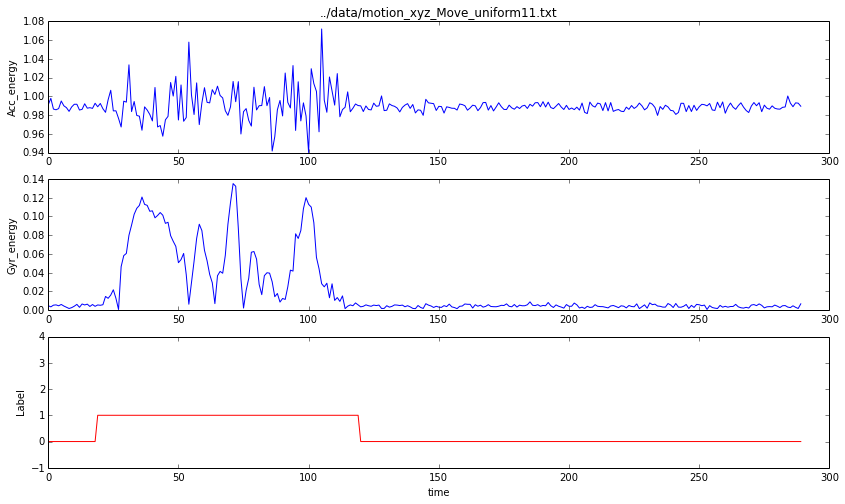

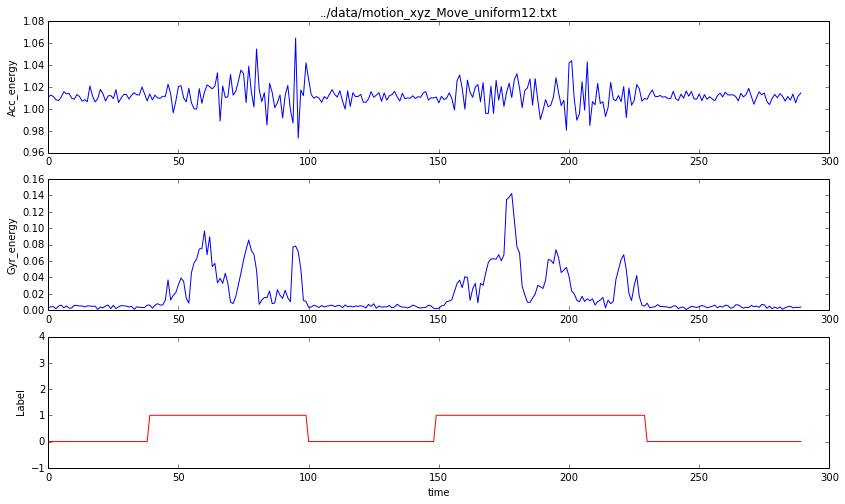

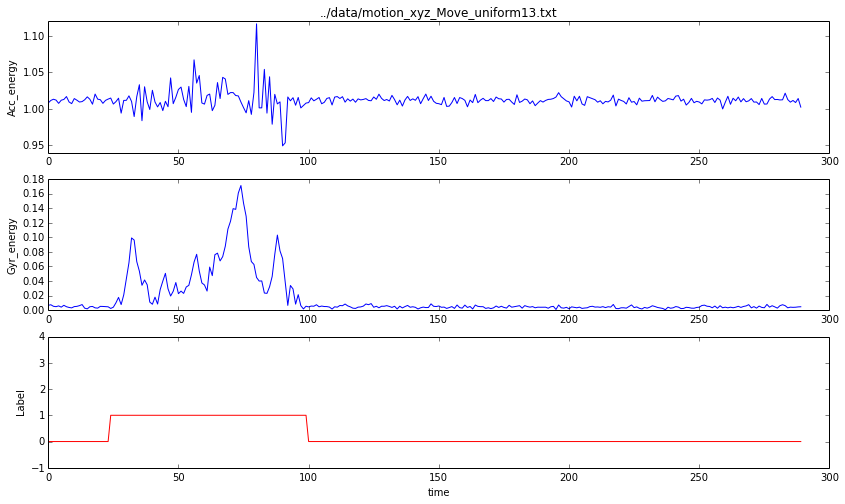

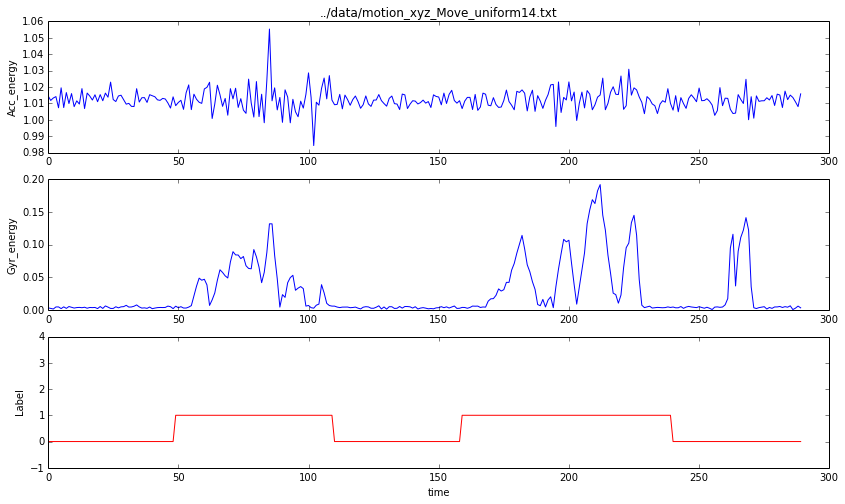

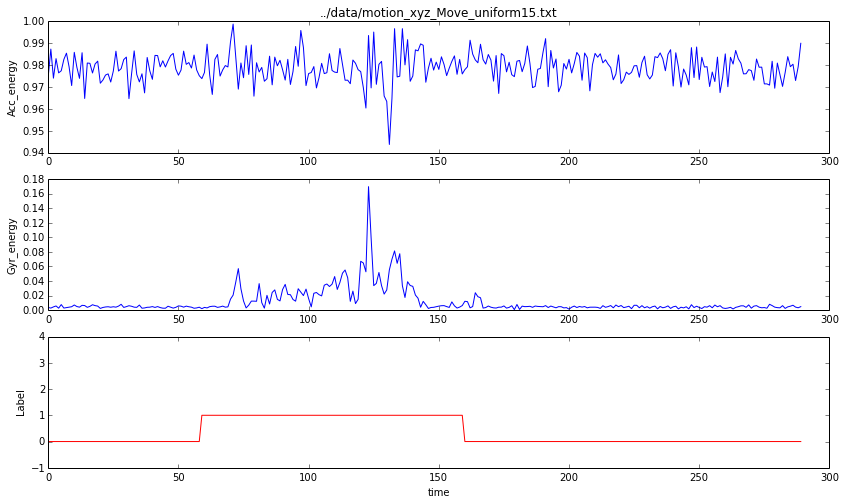

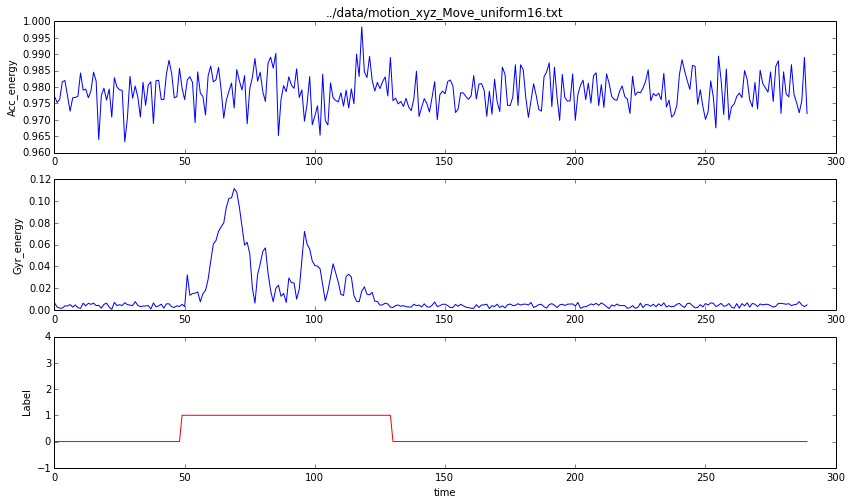

In [7]:
if __name__ == '__main__':
    fileNames = []
    for i in range(5, 17):
        fileName = 'motion_xyz_Move_uniform' + str(i) + '.txt'
        fileNames.append(fileName)
    #print fileNames
    
    showMultiFiles(fileNames)

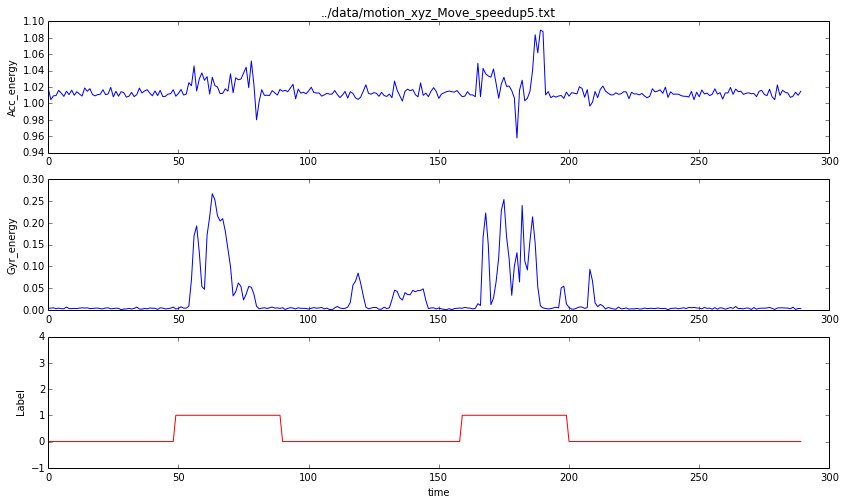

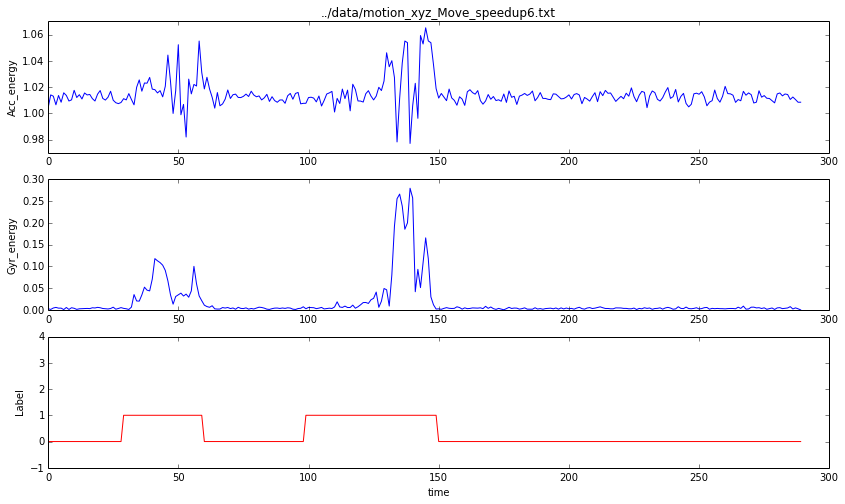

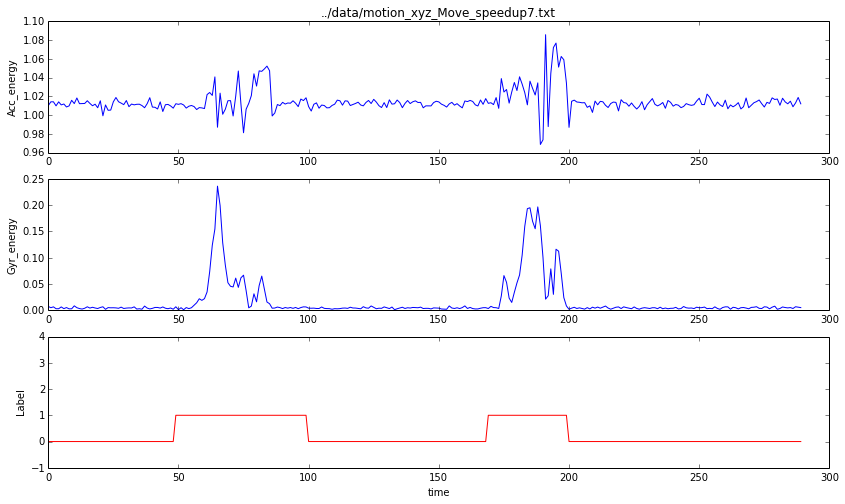

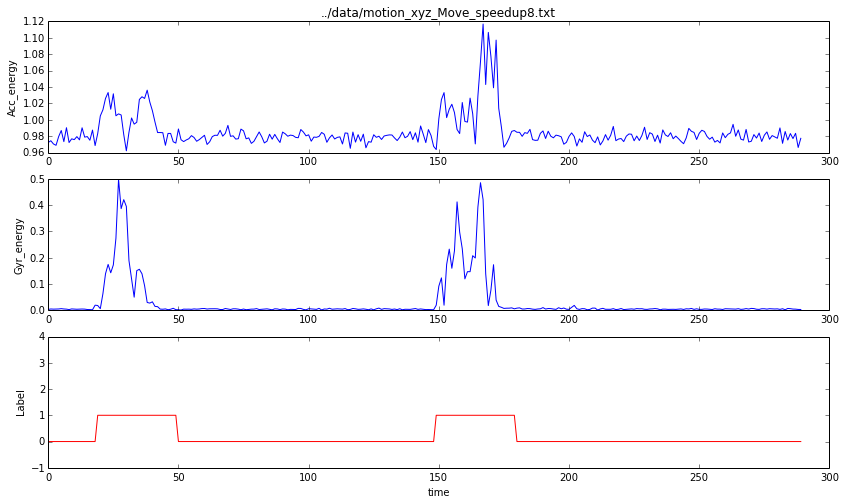

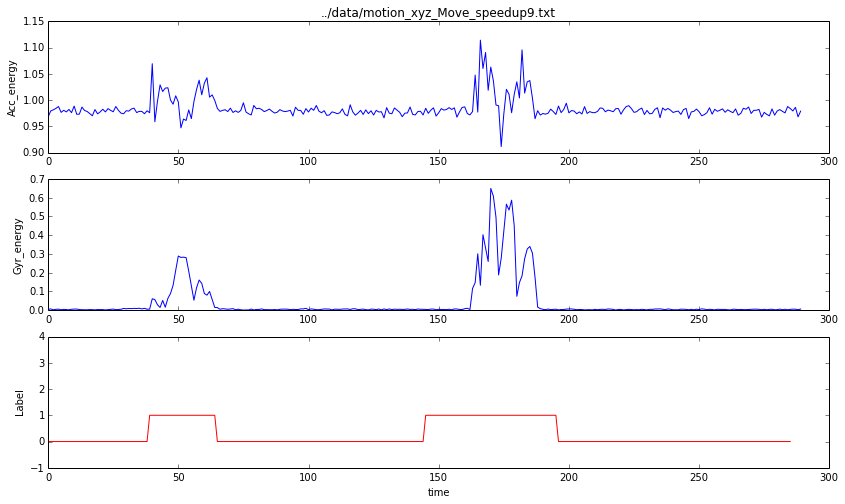

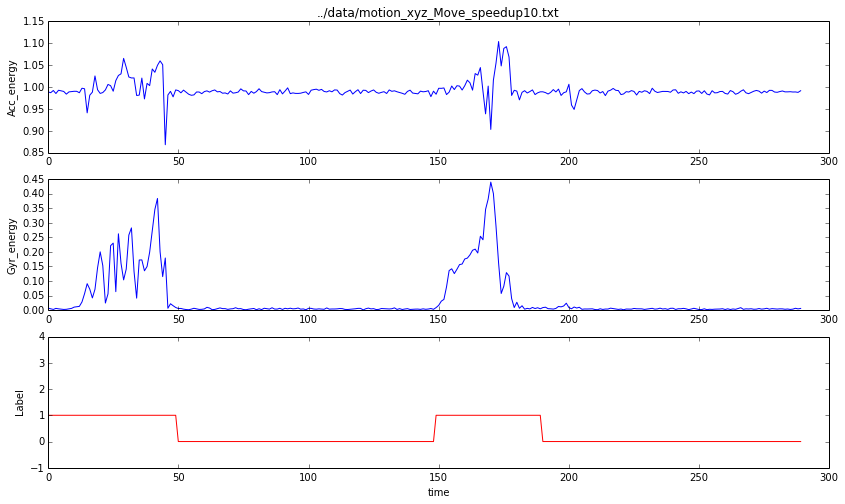

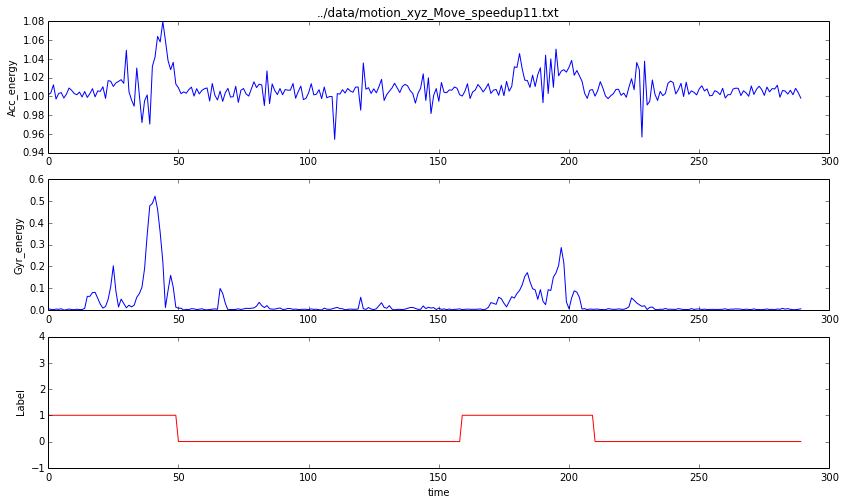

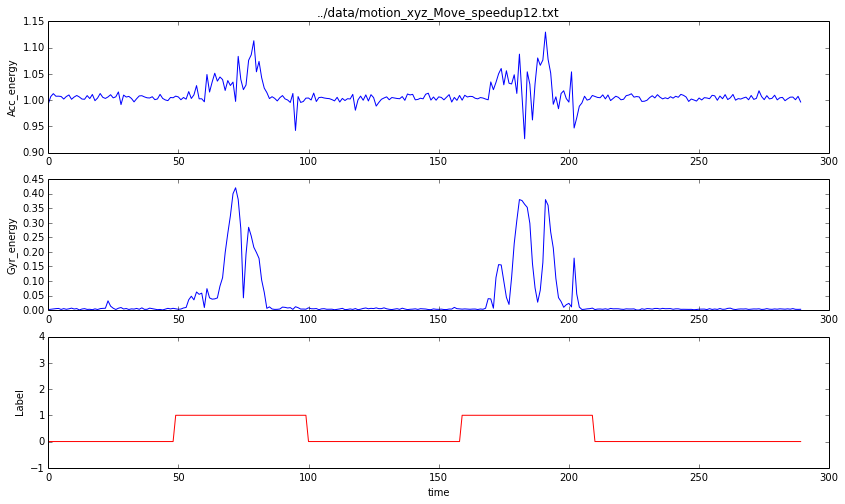

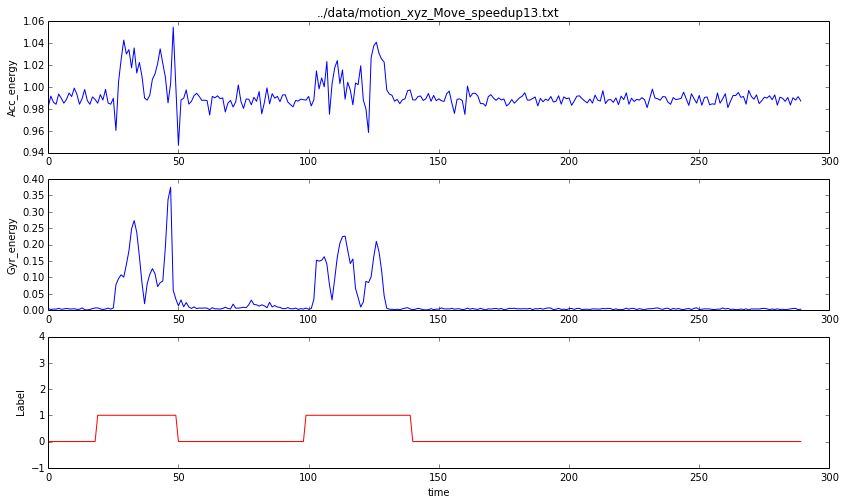

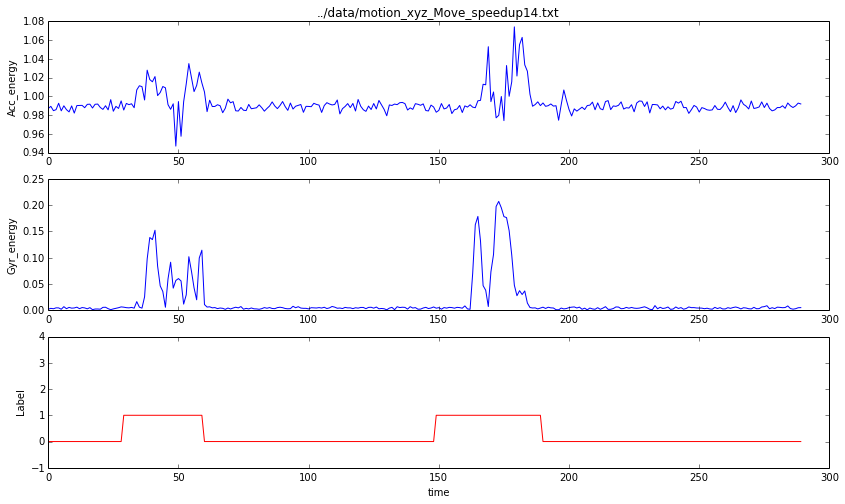

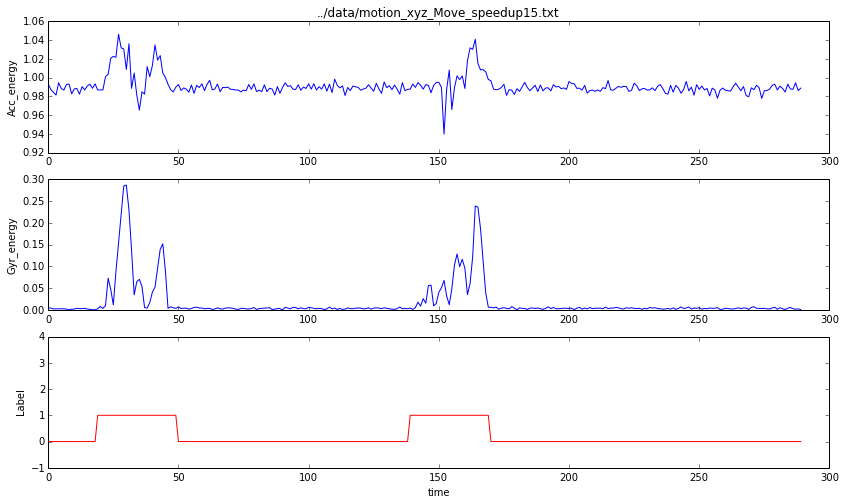

In [8]:
if __name__ == '__main__':
    fileNames = []
    for i in range(5, 16):
        fileName = 'motion_xyz_Move_speedup' + str(i) + '.txt'
        fileNames.append(fileName)
    #print fileNames
    
    showMultiFiles(fileNames)